# 📊Think Career Mentoring Program Impact Analysis

This notebook presents an analysis of data collected through the *Think Career* mentoring program from 2023 Round 1 to 2025 Round 2. The aim of this analysis is to assess the reach, diversity, and potential impact of the program on both mentees.

The data includes responses from participants across different rounds and years. Our goal is to understand the demographics, educational backgrounds, professional connections, and experiences of the mentees to uncover patterns that can help improve the program and demonstrate its value to stakeholders.

## 🎯 Objectives

- Clean and prepare the raw data to ensure consistency and reliability.
- Analyze the data to extract meaningful patterns, trends, and insights.
- Visualize findings using clear, accessible charts and graphs.
- Present insights in a way that can inform decision-making and program development.

## 📂 Workflow

1. **Data Cleaning**: Standardizing categorical values, removing duplicates, handling missing data, and normalizing text fields.
2. **Exploratory Data Analysis (EDA)**: Descriptive statistics, distributions, and comparisons across years and participant groups.
3. **Visual Insight Generation**: Plotting key metrics with annotations to highlight trends and proportions.
4. **Summary & Interpretation**: Drawing conclusions based on observed data patterns and recommending next steps or improvements.

All visuals and analysis are tailored for a general audience, with the goal of making the results accessible to non-technical stakeholders and collaborators. This notebook is part of a transparent, reproducible workflow and is intended to be shared and maintained in the Think Career's database and on Thacienne uwimanayantumye's repository in GitHub.
The data are only shared under the Think Career's permissions.


## Importing Required Libraries

First of all, we import all the necessary libraries that will support data cleaning, exploration, visualization, and advanced analysis. These libraries span basic Python utilities, data manipulation tools, and machine learning packages that allow us to extract insights from text and structure data effectively. **Make sure that all the following libraries are installed before running this note book**.

- **warnings**: Used to suppress non-critical warnings for a cleaner notebook output.
- **pandas**: Core library for data manipulation and analysis; used for loading, cleaning, and processing tabular data.
- **numpy**: Adds support for numerical operations, particularly helpful for array computations and mathematical functions.
- **matplotlib.pyplot**: Base plotting library used for creating visualizations.
- **seaborn**: Built on top of `matplotlib`; provides more advanced and aesthetically pleasing statistical plots.
- **os**: Enables interaction with the operating system for tasks like file path management.
- **re**: Provides regular expression operations for text cleaning and pattern matching.
- **glob**: Helps in searching and retrieving files using wildcards, useful for batch processing data files.
- **tabulate**: Used to format tabular data into readable tables when printing to console or reports.

- **time**: Adds delays to allow file system operations (like saving images) to complete properly.
- **xlwings**: Interfaces with Excel to read/write data, format sheets, and insert images.
- **plotly.express**: Enables interactive and dynamic plotting, useful for online or dashboard-based presentations.
- **sklearn.feature_extraction.text.TfidfVectorizer**: Converts text data into numerical form based on term frequency–inverse document frequency (TF-IDF); useful for clustering and topic modeling.
- **sklearn.cluster.KMeans**: Implements K-means clustering algorithm for unsupervised learning, used to find patterns or groupings in the data.
- **sentence_transformers**: Provides high-quality sentence embeddings using models like BERT; crucial for semantic similarity analysis.
- **umap.umap_**: Used for dimensionality reduction and visualization of high-dimensional data such as text embeddings.

By importing these libraries at the beginning, we ensure our environment is prepared to handle both the routine and advanced tasks involved in this analysis.


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd  
import numpy as np                  
import matplotlib.pyplot as plt        
import seaborn as sns                                            
import os
import re
import glob

from tabulate import tabulate
import plotly.express as px
import time
import xlwings as xw
import pycountry
import pycountry_convert as pc
import dash
from dash import dcc, html, Input, Output

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer, util
import umap.umap_ as umap

## 🔧 Starting the Data Cleaning Process

Before diving into the analysis, it's essential to ensure our data is clean, consistent, and usable. Data often comes with inconsistencies in formatting, naming, or encoding, especially when collected from forms or multiple sources. Cleaning helps us avoid downstream errors and ensures the integrity of our analysis.

In this section, we define and use two functions to help with the initial cleaning of the column names in our dataset:

### 1. `clean_column_names()`
This utility function takes in a column name (a string) and:
- Strips leading/trailing whitespace,
- Replaces newline characters (`\n`) with a space,
- Removes excessive spaces and special characters like colons (`:`) and quotes (`"`).

This ensures that column headers are standardized, making them easier to read and use in code without unexpected behavior.

### 2. `preview_cleaned_columns_names()`
This function:
- Looks into a specified folder (default is `"mentees"`) for `.xlsx` Excel files.
- For each file, it reads the original column names.
- It then applies the `clean_column_names()` function to each column name.
- Finally, it prints both the original and cleaned versions of the column headers for review.

This preview step is extremely helpful for verifying that our cleaning rules are working as intended before proceeding to clean the data itself.

By running this preview, we ensure we're starting our analysis with well-structured and clearly labeled data columns across all files.


In [2]:
# === Cleaning utility function ===
def clean_column_names(col):
    """Remove numbering or extra formatting"""
    return (
        col.strip()
        .replace("\n", " ")
        .replace("  ", " ")
        .replace(":", "")
        .replace('"', "")
        .strip()
    )

# === Function to clean and display column names for all files ===
def preview_cleaned_columns_names(folder_path="mentees"):
    file_paths = glob.glob(os.path.join(folder_path, "*.xlsx"))

    if not file_paths:
        print("No Excel files found in the folder.")
        return

    for file_path in file_paths:
        print(f"\n=== {os.path.basename(file_path)} ===")
        df = pd.read_excel(file_path)
        original_columns = df.columns.tolist()
        cleaned_columns = [clean_column_names(col) for col in original_columns]

        print("Original Column Names:")
        for col in original_columns:
            print(f" {col}")

        print("\nCleaned Column Names:")
        for col in cleaned_columns:
            print(f" {col}")
# Use the function to ensure it works as expected and also use it to know the names of columns in our datasets and plan on how to standardise them across files.          
preview_cleaned_columns_names("post_assessment_2024")


=== post_assessment_2024_r1.xlsx ===
Original Column Names:
 Timestamp
 Your full name
 Which City (Region) in Finland do you live in?
 1. Which statement best describes where you are CURRENTLY?
 2. How many job posts did you see advertised within your field of interest in Finland over the past 5 months?(Provide an estimate)
 
3. How many job or internship applications did you send during the past 5 months with the support of your mentor?
 4. Of those applications, how many invited you for an interview/exam?
 5. Did the mentorship programme/mentor influence how you tailor your cover letter for each application?
 6. Did the mentorship programme/mentor influence how you tailor your CV for each application?
 7. Do you believe that after completing the mentorship programme or with the help of your mentor, you now better understand employers’ expectations  in your field in Finland?
 8. I feel optimistic about my job prospects in Finland after completing the programme.
 9. Do you now have a

## 🧹 Cleaning and Standardizing Column Names

To make our analysis consistent across multiple rounds and participant types (mentees and mentors), we must **standardize the column names**. Since the surveys evolve over time, column names in the raw Excel files may vary slightly across different rounds or contain extra formatting like numbers or punctuation.

### 🔍 1. `extract_year_round()`

This function is a small helper that reads the filename (e.g., `"mentees_2024_r2.xlsx"`) and uses a regular expression to extract the **year** (e.g., `2024`) and **round** (e.g., `2`). This is helpful for tagging or organizing data later during merging and visualization.

---

### 🧼 2. `standardize_mentee_columns()`,  `standardize_mentor_columns()`, `standardize_pre_assessment_columns()`, and `standardize_pre_assessment_columns()`

These four functions serve a similar purpose for mentee, mentor, pre_assessments, and post_assessments files, respectively. Here's what each one does:

- **Cleans up the raw column name** using the `clean_column_names()` utility function (removing newlines, double spaces, colons, quotes, etc.).
- Then, it matches the cleaned name against a predefined `mapping` dictionary.

The `mapping` acts as a **translation table**, converting long or inconsistently written column headers into short, clean, standardized variable names (e.g., `"Your full name"` → `"full_name"`, or `"Please provide your LinkedIn or other online profile..."` → `"linkedin_or_other"`).

This is necessary because:
- Some column headers differ slightly between rounds (e.g., changes in phrasing).
- Others are numbered (e.g., `"12. Will you be available..."`) or reordered.
- A standardized format simplifies downstream merging, filtering, and plotting.

By using these functions, we ensure that:
✅ Column names are clean and consistent  
✅ We don’t break our code due to slight differences in the data  
✅ We can apply unified logic across files from different years/rounds

---

Each of these functions returns either the matched standardized name or a lowercase fallback if no match is found. This is helpful for catching new columns we haven’t mapped yet while still allowing the notebook to continue running.


In [3]:
# === Utility Functions ===

def extract_year_round(filename):
    """Extracts year and round info from filename like 'mentees_2024_r2.xlsx'"""
    match = re.search(r'(\d{4})_r(\d)', filename)
    if match:
        return int(match.group(1)), int(match.group(2))
    return None, None

#====Standardizing column names====

def standardize_mentee_columns(col):
    """Map mentee column to standard names"""
    col = clean_column_names(col)

    # Define mappings (feel free to expand this)
    mapping = {
        "Timestamp": "timestam",
        "Your full name": "full_name",
        "Email": "email",
        "Phone number": "phone",
        "Country of Birth/Origin": "country_origin",
        "Gender": "gender",
        "Age": "age",
        "In which field and position do you desire to work?": "desired_field",
        "What's your highest level of education in that field?": "education_level",
        "How many years of working experience do you have in that field?": "work_experience",
        "What has been your biggest challenge in finding a work opportunity in your desired field?": "challenge_to_find_work",
        "What kind of help are you hoping to get from a mentor?": "expected_help",
        "Please let us know, if you are planning to change from your field to another one and need support in your new desired field.": "change_work",
        "Provide link to your LinkedIn profile or online CV (If you don't have those, please send your CV to sofia@thinkafrica.fi)": "linkedin_or_cv",
        "Do you need a child minder?": "need_child_minder",
        "Will you be available for the whole duration of the program (April-June 2023)?": "full_available",
        "Will you be available for the whole duration of the program (September - December 2023)?": "full_available",
        "What are your exceptions, if any?": "exceptions",
        "Anything else to add?": "anything_to_add",
        "How did you hear about the Programme?": "info_source",
        "If you answered, other to the previous question, Please let us know where you first learned about the Programme?": "other_source",
        "4. In which field and position do you desire to work?": "desired_field",
        "5. What's your highest level of education?": "education_level",
        "6. How many years of working experience do you have in that field?": "work_experience",
        "7. What has been your biggest challenge in finding a work opportunity in your desired field?": "challenge_to_find_work",
        "8. What kind of help are you hoping to get from a mentor?": "expected_help",
        "10. Please let us know, if you are planning to change from your field to another one and need support in your new desired field.": "change_work",
        "11. Provide link to your LinkedIn profile or online CV (If you don't have those, please send your CV to sofia@thinkafrica.fi)": "linkedin_or_cv",
        "14. During the In-person meetings of Think Career, do you need a child minder?": "need_child_minder",
        "12. Will you be available for the whole duration of the program (May-September 2024)?": "full_available",
        "12. Will you be available for the whole duration of the programme?": "full_available",
        "12. Will you be available for the whole duration of the programme (September, 2024 - January, 2025)?":"full_available",
        "13. What are your exceptions to the workshops?": "exceptions",
        "15. How did you hear about the Programme?": "info_source",
        "16. If you answered, other to the previous question, Please let us know where you first learned about the Programme?": "other_source",
        "Anything else to add?": "anything_to_add",
        "1. Which City (Region) in Finland do you live in?": "city_finland",
        "9. Would you like to share your online profile link with other mentors & mentees of Think Career? An excel form with names & profiles will be shared with participants who have given their permission.": "shared_profile",
        "3. Which statement best describes where you are CURRENTLY?": "employment_status",
        "3a. If you are a student, please specify the type of program you are currently enrolled in.": "student",
        "3b. If you replied other to the above questions, please write your answer.": "other_status",
        "2. For how long have you lived in Finland?": "how_long_in_finland",
        "13. Will you be available for 2 half-a-day workshops with the most voted dates by participants?": "available_workshop",

    }

    return mapping.get(col, col.lower().strip())

def standardize_mentor_columns(col):
    """Map mentor column to standard names"""
    col = clean_column_names(col)

    mapping = {
        "Timestamp": "timestamp",
        "Names": "full_name",
        "Full name":"full_name",
        "Email": "email",
        "Phone number": "phone",
        "Country of Birth/Origin": "country_origin",
        "How long have you lived in Finland?": "how_long_in_finland",
        "Gender": "gender",
        "What is your field of expertise?": "expertise_field",
        "What is your combined work experience in your field of expertise from different companies or organizations?": "work_experience",
        "What is your role in your current company/organization?": "current_role",
        "How long have you been in your current company/organization?": "work_experience_current_company",
        "Have you ever been unemployed for a long period of time?": "long_unemployed",
        "Please provide your LinkedIn or other online profile or other links where you or your work have been featured.": "linkedin_or_other",
        "In what way can you help your mentee?": "how_to_help_mentees",
        "Which networks are you able to introduce your mentee to?": "which_network",
        "Do you need a child minder during our sessions?": "need_child_minder",
        "will you be available for the whole duration of the program (April - June 2023)?": "full_available",
        "Will you be available for the whole duration of the program (April - June 2023)?": "full_available",
        "will you be available for the whole duration of the program (september - december 2023)?": "full_available",
        "What are your exceptions to your availability, if any?": "exceptions",
        "What sparked your interest to become a mentor?": "why_mentoring",
        "Anything else to add?": "anything_to_add",
        "Will you be available for the whole duration of the program (September - December 2023)?": "full_available",
        "How did you hear about the Programme?": "info_source",
        "If you answered, other to the previous question, Please let us know where you first learned about the Programme?": "other_source",
        "1. Which City (Region) in Finland do you live in?": "city_finland",
        "2. How long have you lived in Finland?": "how_long_in_finland",
        "3. What is your field of expertise?": "expertise_field",
        "4. What is your combined work experience in your field of expertise from different companies or organizations?": "work_experience",
        "7. What is your role in your current company/organization?": "current_role",
        "8. How long have you been in your current company/organization?": "work_experience_current_company",
        "Have you ever been unemployed for a long period of time?": "long_unemployed",
        "10. Please provide your LinkedIn or other online profile or other links where you or your work have been featured.": "linkedin_or_other",
        "9. In what way can you help your mentee?": "how_to_help_mentees",
        "14. During the In-person meetings of Think Career, do you need a child minder?": "need_child_minder",
        "12. Will you be available for the whole duration of the program (May-September 2024)?": "full_available",
        "12. Will you be available for the whole duration of the programme (September, 2024 - January, 2025)?": "full_available",
        "12. Will you be available for the whole duration of the programme?": "full_available",
        "13. What are your exceptions to your availability, if any?": "exceptions",
        "15. How did you hear about the Programme?": "info_source",
        "16. If you answered, other to the previous question, Please let us know where you first learned about the Programme?": "other_source",
        "11. Would you like to share your online profile link with other mentors & mentees of Think Career? An excel form with name & profiles will be shared with participants who have given their permission.": "share_profile",
        "10. If your answer to question 9 above is Other, please specify.": "specify_help",

    }

    return mapping.get(col, col.lower().strip())

# Standizing column names in the pre_post_assessment files
def standardize_pre_assessment_columns(col):
    col = clean_column_names(col)
    mapping = {
       'Timestamp': "timestamp", 
       'Your full name': 'full name',
       '1. Which statement best describes where you are CURRENTLY?': 'employment_status',
       '2. How many job or internships applications did you send in the last 3 months?': 'applications_in_last_3months',
       '2. How many job posts do you see advertised within your field of interest in Finland over a three-month period?': 'job_advertised_in_3months',
       '2. How many job posts do you see advertised within your field of interest in Finland over a five-month period?':'job_advertised_in_5months',
       '3. Of those applications, how many would you estimate were a good fit with your field of interest?': 'good_fit_applications',
       '4. Of those applications, how many invited you for an interview/exam?': 'interview',
       "5. From your point of view,  please describe employers' expectations in your field in Finland": 'employer_expectation',
       "5.  From your point of view,  please describe employers' expectations in your field in Finland.": 'employer_expectation',
       "5. from your point of view,  please describe employers' expectations in your field in Finland.": 'employer_expectation',
       "5. From your point of view, please describe employers' expectations in your field in Finland.": 'employer_expectation',
       "5. I have a skill set that meets employers’ expectations in Finland.": 'have_skillset',
       '6. I feel optimistic about my job prospects in Finland.': 'feel_optimistic',
       "6. I have a skill set that meets employers’ expectations in Finland.": 'have_skillset',
       '7.  I feel useful/able to contribute in my field in Finland.': 'feel_useful',
       '7.  I feel useful/able to contribute in my field in Finland.': 'feel_useful',
       '7. I feel useful/able to contribute in my field in Finland.': 'feel_useful',
       '8.  I feel useful/able to contribute in my field in Finland.':'feel_useful',
       '8. I feel useful/able to contribute in my field in Finland.': 'feel_useful',
       '8. Do you tailor your cover letter for each application?': 'tailor_cv',
       '9. Do you tailor your cover letter for each application?':'tailor_cover_letter',
       '9. Do you tailor your CV for each application?': 'tailor_cover_letter',
       '10. Do you tailor your CV for each application?':'tailor_cv',
       '7. I feel optimistic about my job prospects in Finland.': 'feel_optimistic',
       '7. i feel optimistic about my job prospects in Finland.': 'feel_optimistic',
       '10. Do you currently have an online portfolio of your work?': 'have_portfolio',
       '8. Do you currently have an online portfolio of your work?':'have_portfolio',
       '9. How well prepared are you prepared to pitch (about your professional background)  to potential employers in a short and concise manner, letting them understand your value easily?':'ready_to_pitch',
       '11. How well prepared are you prepared to pitch (about your professional background) to potential employers in a short and concise manner, letting them understand your value easily?': 'ready_to_pitch',
       '12. How many networking events (can be also online), relevant to your field of interest, did you attend in the last 3 months?': 'networking_events',
       '13. How many professional contacts do you have now? (e.g., on LinkedIn, Meetup)':'professional_contacts',
       '11. How many professional contacts do you have now? (e.g., on LinkedIn, Meetup)':'professional_contacts',
       '14. How many Network groups relevant to your field of interest do you belong to currently?': 'network_groups',
       '12. How many Network groups relevant to your field of interest do you belong to currently?': 'network_groups',
       '15. Describe how you currently make yourself or your online portfolio (LinkedIn profile) visible to the contacts or networks you have.': 'self_visibility',
       '16. How do you learn about open positions relevant to your field of interest?  (Select all that apply)': 'learn_open_positions',
       '16. how do you learn about open positions relevant to your field of interest?  (Select all that apply)': 'learn_open_positions',
       '17. Anything else to share?': 'anything_else',
       '6. I have a skill set that meets employers  expectations in finland.': 'have_skillset',
       '7. I feel optimistic about my job prospects in finland.': 'feel_optimistic',
       '8. I feel useful/able to contribute in my field in finland.': 'feel_useful',
       '9. Do you tailor your cover letter for each application?': 'tailor_cover_letter',
       '10. Do you tailor your cv for each application?': 'tailor_cv',
       '8. Do you currently have an online portfolio of your work?': 'have_portfolio',
       '9. How well prepared are you prepared to pitch (about your professional background) to potential employers in a short and concise manner, letting them understand your value easily?': 'ready_to_pitch',
       '10. How many networking events (can be also online), relevant to your field of interest, did you attend in the last 3 months?': 'networking_events',
       '11. How many professional contacts do you have now? (e.g., on linkedin, meetup)': 'professional_contacts',
       '12. How many network groups relevant to your field of interest do you belong to currently?': 'network_groups',
       '13. Describe how you currently make yourself or your online portfolio (linkedin profile) visible to the contacts or networks you have.': 'self_visibility',
       '13. Describe how you currently make yourself or your online portfolio (LinkedIn profile) visible to the contacts or networks you have.':'self_visibility',
       '14. How do you learn about open positions relevant to your field of interest? (Select all that apply)': 'learn_open_positions',
       '16. How do you learn about open positions relevant to your field of interest? (Select all that apply)': 'learn_open_positions',
       '15. Anything else to share?': 'anything_else',
       'Which city (region) in finland do you live in?': 'city_in_finland',
       'Which City (Region) in Finland do you live in?':'city_in_finland',
       '2. How many job posts do you see advertised within your field of interest in finland over a three-month period?': 'posts_advertised',
       '3. How many job or internship applications would you send on average in 3 months time?': 'applications_in_last_3months',
       '8. I feel optimistic about my job prospects in Finland.': 'feel_optimistic',
       '7. I have a skill set that meets employers expectations in finland.': 'have_skillset',
       '6. Do you tailor your cover letter for each application?': 'tailor_cover_letter',
       '5. Do you tailor your cv for each application?': 'tailor_cv',
       '5. Do you tailor your CV for each application?': 'tailor_cv',
       '9. Do you currently have an online portfolio of your work?': 'have_portfolio',
       '12. How well prepared are you to communicate clearly (about your professional background) to potential employers in a short and concise manner, letting them understand your value easily?': 'ready_to_pitch',
       '11. How many networking events (can be also online)  relevant to your field of interest  do you attend on average on a given 3 months time?': 'networking_events',
       "11. How many networking events (can be also online), relevant to your field of interest, do you attend on average on a given 3 months' time?": 'networking_events',
       '10. How many professional contacts do you have now? (e.g., on linkedin, meetup)': 'professional_contacts',
       '10. How many professional contacts do you have now? (e.g., on LinkedIn, Meetup)': 'professional_contacts',
       '13. How many networking groups or associations are you currently a member of that are relevant to you?': 'network_groups',
       '2. How many job posts do you see advertised within your field of interest in finland over a five-month period?': 'post_advertised',
       '9. Of those applications, how many invited you for an interview/exam?': 'how_many_interview'
    }
    return mapping.get(col, col.lower().strip())


def standardize_post_assessment_columns(col):
    col = clean_column_names(col)
    mapping = {
        'Timestamp': 'timestamp',
        'Your full name': 'full_name',
        '1. Which statement best describes you BEFORE the mentorship program?': 'status_before',
        '2. Which statement best describes where you are CURRENTLY?': 'current_status',
        '3A. Has your status changed in any other way since joining the program?': 'other_status_change',
        '3B. If you answered yes to the above question, please explain briefly.': 'status_change_in_which_way',
        '4. How has the mentorship program helped you? (Select all that apply)': 'help_from_the_problem',
        '5. How many job or internship applications did you send in the last 3 months since joining the program?': 'number_of_applications',
        '6. Did you tailor your CV for the applications you sent since joining the program?': 'tailor_cv',
        '7. Did you tailor your cover letter for the applications you sent since joining the program? ?': 'tailor_cover_letter',
        '8. Of those applications, how many would you estimate were a good fit with your field of interest?': 'goodfit_applications',
        '9. Of those applications, how many invited you for an interview/exam?': 'interview',
        '10. I believe I have the skill set that meets employers’ expectations in Finland.': 'have_skillset',
        '11. I feel optimistic about my job prospects in Finland.': 'feel_optimistic',
        '12. I feel useful/able to contribute in my field in Finland.': 'feel_useful',
        '13. Do you currently have an online portfolio of your work?': 'have_portfolio',
        '14. How well prepared are you prepared to pitch (about your professional background) to potential employers in a short and concise manner, letting them understand your value easily?': 'prepared_to_pitch',
        '15. How many networking events (can be online), relevant to your field of interest, did you attend in the last 3 months?': 'networking_events',
        '16. How many professional contacts do you have now? (e.g., on LinkedIn)': 'professional_contacts',
        '17. How many Network groups relevant to your field of interest do you belong to currently?': 'network_groups',
        '18. Describe how you currently make yourself or your online portfolio visible to the contacts or networks you have.': 'self_visibility',
        '19. How likely are you to recommend the program to others?': 'recommend_the_program',
        '20. Anything else to share? Thank you!': 'anything_else', 
        'Timestamp': 'timestamp',
        'Your full name': 'full_name',
        'Which City (Region) in Finland do you live in?': 'city_in_finland',
        '1. Which statement best describes where you are CURRENTLY?': 'current_status', 
        '2. How many job posts did you see advertised within your field of interest in Finland over the past 5 months?(Provide an estimate)': 'number_of_job_adds',
        '3. How many job or internship applications did you send during the past 5 months with the support of your mentor?': 'number_of_applications',
        '4. Of those applications, how many invited you for an interview/exam?': 'interview',
        '5. Did the mentorship programme/mentor influence how you tailor your cover letter for each application?': 'tailor_cover_letter_due_to_program',
        '6. Did the mentorship programme/mentor influence how you tailor your CV for each application?': 'tailor_cv_due_to_program',
        '7. Do you believe that after completing the mentorship programme or with the help of your mentor, you now better understand employers’ expectations  in your field in Finland?': 'understand_employers_expectations',
        '7. Do you believe that after completing the mentorship programme or with the help of your mentor, you now better understand employers’ expectations in your field in Finland?': 'understand_employers_expectations',
        '8. I feel optimistic about my job prospects in Finland after completing the programme.': 'feel_optimistic',
        '9. Do you now have an online portfolio of your work?': 'have_portfolio',
        '10. How many professional contacts have you made during the mentorship programme or because of your mentor (e.g., on LinkedIn, other channels)?': 'professional_contacts',
        '11. How many networking events (including online) did you attend over the past 5 months?': 'networking_events',
        '12. How prepared do you feel now to communicate your professional background clearly to potential employers in a short and concise manner?': 'prepared_to_pitch',
        '13a. Are you a member of any additional networking groups/associations relevant to your field as a result of the mentorship programme?': 'network_groups',
        '13b.  If you answered yes to question 13a, how many networking groups/associations are you a part of?': 'which_network_groups',
        '13b. If you answered yes to question 13a, how many networking groups/associations are you a part of?': 'which_network_groups',
        '14.  How do you currently learn about open positions relevant to your field of interest? (Select all that apply)': 'learn_open_positions',
        '14. How do you currently learn about open positions relevant to your field of interest? (Select all that apply)': 'learn_open_positions',
        '15. The mentorship programme helped me improve my understanding of job search strategies in Finland.': 'understand_job_strategy',
        '16. I feel more confident about handling challenges in my career as a result of this mentorship.':'confident_to_handle_challenges',
        '17. I felt supported by my mentor.': 'feel_supported',
        '18.  My mentor provided me with encouragement and motivation.': 'engouraged_motivated_by_mentor',
        '18. My mentor provided me with encouragement and motivation.': 'engouraged_motivated_by_mentor',
        '19. What valuable input would you attribute to your mentor?': 'valuable_input_from_mentor',
        '20. What was the most valuable aspect of the mentorship programme for you?': 'most_valuable_aspect_of_the program',
        '21. Anything else to share?': 'anything_else', 

    }
    return mapping.get(col, col.lower().strip())

## 🧼 Cleaning Raw Excel Files into Structured DataFrames

With our column standardization functions in place, we now move on to loading and partially cleaning the data.

Think Career collects input from several structured sources:
- 📋 Mentee application forms  
- 👥 Mentor sign-up forms  
- ✅ Pre-program assessments  
- 📈 Post-program assessments  

Each file follows a similar logic but may differ in layout or column labels depending on the round or year. These cleaning functions help us to:
- 🧽 Standardize the column names across multiple versions
- 📅 Extract and tag metadata like **year** and **round** directly from the filename
- 🗂 Track which file each row came from (useful for debugging or audits)

---

### 🔧 What These Cleaning Functions: `clean_mentee_file(file_path)`, `clean_mentor_file(file_path)`, `clean_pre_file(file_path)`, `clean_post_file(file_path)` Do?

Each function:
1. Loads the spreadsheet into a **Pandas DataFrame**
2. Standardizes column names using a specific mapping function
3. Extracts the `year` and `round` from the file name
4. Adds metadata columns: `year`, `round`, and `source_file`
5. Returns a *structured* DataFrame

---

**Important Note**:  
At this stage, the data has only been *structured and standardized*.  
We have **not yet checked for:**
- Missing values  
- Duplicates  
- Inconsistent or malformed entries (e.g. mislabels, typos)

These validations will follow in the next step, before we begin any analysis.


In [4]:
# === Cleaning Functions ===

def clean_mentee_file(file_path):
    df = pd.read_excel(file_path)
    df.columns = [standardize_mentee_columns(col) for col in df.columns]
    year, round_ = extract_year_round(file_path)
    df["year"] = year
    df["round"] = round_
    df["source_file"] = os.path.basename(file_path)
    return df

def clean_mentor_file(file_path):
    df = pd.read_excel(file_path)
    df.columns = [standardize_mentor_columns(col) for col in df.columns]
    year, round_ = extract_year_round(file_path)
    df["year"] = year
    df["round"] = round_
    df["source_file"] = os.path.basename(file_path)
    return df

def clean_pre_file(file_path):
    df = pd.read_excel(file_path)
    df.columns = [standardize_pre_assessment_columns(col) for col in df.columns]
    year, round_ = extract_year_round(file_path)
    df["year"] = year
    df["round"] = round_
    df["source_file"] = os.path.basename(file_path)
    return df

def clean_post_file(file_path):
    df = pd.read_excel(file_path)
    df.columns = [standardize_post_assessment_columns(col) for col in df.columns]
    year, round_ = extract_year_round(file_path)
    df["year"] = year
    df["round"] = round_
    df["source_file"] = os.path.basename(file_path)
    return df

## 📦 Loading & Combining Cleaned Files

Now that we’ve defined functions to clean individual files, this step focuses on **batch processing all files** from each data category (mentees, mentors, assessments) and **combining** them into unified datasets.

---

### 🗂 What This Code Does

#### 1. **Loads and Cleans All Excel Files**
For each type of input, we:
- Use `glob.glob()` to list all relevant Excel files in a folder
- Apply the appropriate cleaning function to each file
- Combine all cleaned DataFrames into one using `pd.concat()`

This ensures that:
- Data across multiple rounds (and years) is merged into a single DataFrame per category
- Column names and structure are standardized

#### 2. **Breakdown by Category**
- `mentees_all`: All mentee application forms  
- `mentors_all`: All mentor sign-up forms  
- `pre_2023_all` & `pre_2024_all`: Pre-program assessments (split by year)  
- `post_2023_all` & `post_2024_all`: Post-program assessments (split by year)

#### 3. **Basic Validation Output**
We print:
- The total number of mentor records
- The total number of mentee records
- The number of columns in the post-2023 dataset  
This gives a quick check that data has loaded and merged as expected.

#### 4. **Save Combined Cleaned Data**
Each combined dataset is exported to Excel using `to_excel()`:
- This allows further inspection or backup before we perform deeper cleaning like checking for missing values or inconsistencies.
- The saved files act as **intermediate standardized outputs**, useful for sharing or reloading.

---

⚠️ **Note**:  
This step organizes the data and saves it with consistent formatting.  
However, **we are not yet analyzing or validating** the content for quality.  
That will come next — we'll check for:
- ❗ Missing or null values  
- 🔁 Duplicates  
- 🧐 Inconsistent or unexpected entries within columns


In [5]:
# === Load & Combine All Files ===

# Clean mentees
mentee_files = glob.glob("mentees/*.xlsx")
mentees_all = pd.concat([clean_mentee_file(fp) for fp in mentee_files], ignore_index=True)

# Clean mentors
mentor_files = glob.glob("mentors/*.xlsx")
mentors_all = pd.concat([clean_mentor_file(fp) for fp in mentor_files], ignore_index=True)

# clean pre_assessments
#year 2023
pre_2023_files = glob.glob("pre_assessment_2023/*.xlsx")
pre_2023_all = pd.concat([clean_pre_file(fp) for fp in pre_2023_files], ignore_index=True)

#year 2024
pre_2024_files = glob.glob("pre_assessment_2024/*.xlsx")
pre_2024_all = pd.concat([clean_pre_file(fp) for fp in pre_2024_files], ignore_index=True)

# clean post_assessments
#year 2023
post_2023_files = glob.glob("post_assessment_2023/*.xlsx")
post_2023_all = pd.concat([clean_post_file(fp) for fp in post_2023_files], ignore_index=True)

#year 2024
post_2024_files = glob.glob("post_assessment_2024/*.xlsx")
post_2024_all = pd.concat([clean_post_file(fp) for fp in post_2024_files], ignore_index=True)

#how many observations do we have in our datasets
print(len(mentors_all))
print(len(mentees_all))
print(len(post_2023_all.columns))

# saving the combined data with standardized column names
mentees_all.to_excel("mentees_all.xlsx",index=False)
mentors_all.to_excel("mentors_all.xlsx",index=False)
pre_2023_all.to_excel('pre_2023_all.xlsx',index = False)
pre_2024_all.to_excel('pre_2024_all.xlsx',index = False)
post_2023_all.to_excel('post_2023_all.xlsx',index = False)
post_2024_all.to_excel('post_2024_all.xlsx',index = False)


212
302
28


## 🧹 Data Cleaning continues: Handling Missing Values & Duplicates

Now that all data files are loaded and combined, we begin cleaning by addressing two critical issues that can compromise data integrity:

### ✅ 1. **Identify & Remove Missing Values in Key Columns**

We focus on these essential fields:
- `email`: Identifies unique individuals
- `year` and `round`: Contextual information for program participation

For both mentees and mentors:
- We **check for any rows** missing values in these key columns simultanuouslly
- If such rows exist, we **print** their index and content for review
- Then, we **drop** those rows using `dropna(subset=key_cols)`

This ensures that every remaining record has the minimum required information to be usable in further analysis.

---

### 🔁 2. **Standardize Text Before Checking for Duplicates**

To avoid false mismatches:
- We convert emails to lowercase and strip whitespace
- We also trim whitespace from `full_name` values

This makes comparisons consistent when checking for duplicates.

---

### 🧍‍♂️ 3. **Detect and Handle Duplicates**

#### a. **Duplicates Within the Same Round**
- We identify duplicate records based on `email`, `year`, and `round`
- These duplicates often result from multiple form submissions
- We **drop exact duplicates**, keeping only the first occurrence

#### b. **Repeat Participants Across Rounds**
- We then check for people who participated in **multiple rounds or years**, based on duplicate emails
- These are not necessarily bad — they might be returning participants — so we:
  - we keep these cases in DataFrames: `repeated_mentees` and `repeated_mentors`, to be saved in excel files after cleaned from inconsistence.
  - Create separate DataFrames with only the **first appearance** per individual:
    - `unique_mentees`
    - `unique_mentors`
  These datasets will be usefull later in the analysis when unique individuals are useful to track the indicator (e.g education level of mentees/mentors)

---

### Output of the cleaning done so far
we print how many duplicates were removed **within the same round**:
- This gives an immediate sense of how much cleanup was needed due to duplicate submissions.

---

🔍 **Next Steps**
We're now ready to further inspect for **inconsistent entries within columns** and proceed to deeper analysis, knowing that our data is structurally clean.


In [6]:

# === check and remove missing values in key columns ===

key_cols = ["email", "year", "round"]

# Check and print missing value rows in mentees
missing_mentees = mentees_all[mentees_all[key_cols].isnull().any(axis=1)]
if not missing_mentees.empty:
    print("❗ Mentees - Rows with missing key info:\n", missing_mentees.index.tolist())
    print(missing_mentees[key_cols])

# Drop them
mentees_all = mentees_all.dropna(subset=key_cols)

# Check and print missing value rows in mentors
missing_mentors = mentors_all[mentors_all[key_cols].isnull().any(axis=1)]
if not missing_mentors.empty:
    print("❗ Mentors - Rows with missing key info:\n", missing_mentors.index.tolist())
    print(missing_mentors[key_cols])

# Drop them
mentors_all = mentors_all.dropna(subset=key_cols)

# === check and remove duplicates ===

# Standardize email and name casing/spacing
mentees_all["email"] = mentees_all["email"].str.lower().str.strip()
mentees_all["full_name"] = mentees_all["full_name"].str.strip()

mentors_all["email"] = mentors_all["email"].str.lower().str.strip()
mentors_all["full_name"] = mentors_all["full_name"].str.strip()

# View duplicated rows
duplicates_mentees = mentees_all[mentees_all.duplicated(subset=key_cols, keep=False)]
#print("Duplicated Mentee Rows:\n", duplicates_mentees)

duplicates_mentors = mentors_all[mentors_all.duplicated(subset=key_cols, keep=False)]
#print("Duplicated Mentor Rows:\n", duplicates_mentors)

# Drop only exact duplicates in the same year & round
mentees_all_nodup = mentees_all.drop_duplicates(subset=key_cols, keep="first")
mentors_all_nodup = mentors_all.drop_duplicates(subset=key_cols, keep="first")

# Check for people who participated more than once across rounds
repeat_mentees = mentees_all_nodup[mentees_all_nodup.duplicated(subset=["email"], keep='first')]
repeat_mentors = mentors_all_nodup[mentors_all_nodup.duplicated(subset=["email"], keep='first')]

unique_mentees =  mentees_all_nodup.drop_duplicates(subset=["email"], keep='first')
unique_mentors =  mentors_all_nodup.drop_duplicates(subset=["email"], keep='first')

number_unique_mentees = len(unique_mentees["email"].unique())
number_unique_mentors = len(unique_mentors["email"].unique())

print(f"✅ Removed {len(mentees_all) - len(mentees_all_nodup)} mentee duplicates within the same round.")
print(f"✅ Removed {len(mentors_all) - len(mentors_all_nodup)} mentor duplicates within the same round.")

print(f"There is {number_unique_mentees} unique mentees")
print(f"There is {number_unique_mentors} unique mentors")



❗ Mentors - Rows with missing key info:
 [6]
  email  year  round
6   NaN  2023      1
✅ Removed 6 mentee duplicates within the same round.
✅ Removed 1 mentor duplicates within the same round.
There is 284 unique mentees
There is 192 unique mentors


## 🔧 Fixing Inconsistencies: "How Long Have You Lived in Finland?"

This step focuses on **standardizing the answers** in the `how_long_in_finland` column from the mentors dataset. This column contains free-text responses, which can vary in format, detail, and phrasing.

### 🧩 The Problem
Mentors have answered the question *“How long have you lived in Finland?”* in many different ways:
- Quantitatively: `"3 years"`, `"Over 15 years"`, `"4 years "`
- Qualitatively: `"All my life"`, `"In and out all my life"`, `"Lived here almost all my life"`
- With typos or trailing spaces
- Or even vague responses like `"I live in Morocco"`

This variety makes it **hard to group, analyze, or compare responses**.

---

### 🛠️ The Solution
We define a **dictionary (`value_mapping`)** that maps the original, inconsistent responses to a set of clear, standardized categories:
- `"Less than 10 years"`
- `"Over 10 years"`
- `"All or almost all the time"`
- `"Never"`
- `"Not specified"`

Then, we apply this mapping using the `.replace()` method to create a **cleaner version** of the `how_long_in_finland` column.

---

### 🎯 Why This Matters
By consolidating various answers into a small, meaningful set of categories, we:
- Improve data consistency
- Enable easier grouping and filtering
- Reduce ambiguity in the analysis

This kind of normalization is essential when working with open-ended or user-generated input.

---

✅ Once this is done, we can move on to cleaning other columns with similar inconsistencies.


In [7]:
# Define a mapping of old values to standardized new values of years the mentors lived in Finland
value_mapping = {
    'Less than 10 years': "Less than 10 years",
    'Lived here almost all my life. Couple of years in Africa.': "All or almost all the time",
    'Over 10 years': "Over 10 years", 
    'Over 15 years': "Over 10 years",
    'half in Finland, half abroad (UK, US, The Gambia)': "Over 10 years",
    'All your life': "Over 10 years",
    '2 months': "Less than 10 years",
    '3 years ': "Less than 10 years", 
    'Never lived': "Never",
    '9 years': "Less than 10 years",
    '3 months': "Less than 10 years",
    'In and out all my life. In other countries and continents in between.': "Over 10 years",
    'Less than a year': "Less than 10 years",
    'Most of my life in Finland, but also China, UK, Belgium. Moved back to FI 4 years ago.': "All or almost all the time",
    '4 years ': "Less than 10 years",
    'I am originally from Finland but worked/studied in 3 countries during my life.': "All or almost all the time",
    'In and out my whole life :)': "All or almost all the time",
    'Over 26 years ':"Over 10 years",
    'I live in Morocco': "Not specified",
    '3 years': "Less than 10 years",
    'All my life except 2 years in Sweden and 2 years in Portugal': "All or almost all the time",
    '5 months ': "Less than 10 years",
    " 33": "Over 10 years",
}

# Replace values using the mapping
mentors_all_nodup["how_long_in_finland"] = mentors_all_nodup["how_long_in_finland"].replace(value_mapping)
unique_mentors["how_long_in_finland"] = unique_mentors["how_long_in_finland"].replace(value_mapping)


## 🌍 Standardizing Country of Origin Entries

This step cleans and standardizes the `country_origin` column for both mentors and mentees.

### 🚨 The Problem
Participants entered their country in many inconsistent ways:
- Different languages: `"Suomi"` vs. `"Finland"`
- Misspellings: `"Kazachstan"` instead of `"Kazakhstan"`
- Combinations: `"Canada / India"`, `"Namibia/Finland"`
- Redundancies or noise: `"Trinidad & Tobago (why is this relevant?)"`
- Capitalization inconsistencies: `"india"` vs. `"India"`
- ect.

These differences make it hard to **analyze participant backgrounds** accurately.

---

### 🛠️ The Fix
We:
- Remove extra spaces
- Convert all entries to consistent case
- Apply a dictionary of known replacements to fix common errors and standardize country names

This is done for all relevant datasets: `mentees_all_nodup`, `mentors_all_nodup`, `repeat_mentees`, and `repeat_mentors`.

---

### 🎯 Why This Matters
Standardizing country names ensures:
- Accurate grouping by country
- Reliable demographic analysis
- Better data integrity for reporting and visualization

Inconsistent country data can easily skew results—this step prevents that.



In [8]:
#ckeck country names and Cleaning them to remove inconcistence!
mentees_all_nodup["country_origin"] = mentees_all_nodup["country_origin"].astype(str).str.strip()
# Define custom replacements
country_replacements = {
    "Suomi": "Finland",
    "07.01.1995": "unspecified",
    "Nigerian": "Nigeria",
    "Uruguay (Italian-Uruguayan, EU Citizen)": "Uruguay",
    "Kazachstan": "Kazakhstan",
    "Kazachstan (USSR)": "Kazakhstan",
    "Canada / India": "Canada",
    "Kanada": "Canada",
    "Namibia/Finland": "Namibia",
    "Finland/Comoros": "Finland",
    "Trinidad & Tobago (why is this relevant?)": "Trinidad",
    "Venezuela/Armenian": "Venezuela",
    "Born in South Africa, Mother from Finland": "Finland",
    "FINLAND": "Finland",
    "india": "India",
    "England, English": "UK",
    "Russian Federation" : "Russia",
    "Irak, Suomi": "Iraq",
    "kenya": "Kenya",
    "United States": "USA",
    "United states of America": "USA",
    "United states of America ": "USA",
    "United States of America": "USA",
    "United States of America ": "USA",
    "America": "USA",
    "Kamerun": "Cameroon",
    'Britain': 'UK',
    "United Kingdom": "UK",
    "United Kingdon": "UK",
    "England": "UK",
    "Chinese": "China",
    "Turkiye": "Turkey",
    "Trinadad & Tobago": "Trinadad",
    "Russian": "Russia",
    "México": "Mexico",
    "Manila, Philippines": "Philippines",
    "England": "UK",
    "England, English": "UK",
    "Chinise": "China",
    "MOROCCO": "Morocco",
    "PakiSTAN": "Pakistan",
    "UGANDA": "Uganda",
    "nan": "unspecified"
    }

# Apply replacements (after stripping extra spaces)
mentees_all_nodup["country_origin"] = (
    mentees_all_nodup["country_origin"]
    .str.strip()
    .replace(country_replacements)
)

mentors_all_nodup["country_origin"] = (
    mentors_all_nodup["country_origin"]
    .str.strip()
    .replace(country_replacements)
)

unique_mentees["country_origin"] = (
    mentees_all_nodup["country_origin"]
    .str.strip()
    .replace(country_replacements)
)

unique_mentors["country_origin"] = (
    mentors_all_nodup["country_origin"]
    .str.strip()
    .replace(country_replacements)
)



repeat_mentors["country_origin"] = (
    mentors_all_nodup["country_origin"]
    .str.strip()
    .replace(country_replacements)
)

repeat_mentees["country_origin"] = (
    mentees_all_nodup["country_origin"]
    .str.strip()
    .replace(country_replacements)
)
repeat_mentees.to_excel("repeated_mentees.xlsx", index=False)
repeat_mentors.to_excel("repeated_mentors.xlsx", index=False)

## 🎓 Standardizing Education & Expertise Data

To improve the reliability and clarity of our analysis, we standardize how education and expertise levels are recorded for both mentors and mentees.

### 🔍 The Problem
Participants provided their qualifications in various inconsistent ways:
- Degrees described in long-form or informal phrases (e.g., `"Master degree + 5 years post graduate study"` or `"Complete Academic Requirements in Master's Degree"`)
- Mixed entries like `"High School and certified electronics technician"`
- Partial education levels or work experience instead of formal degrees (e.g., `"~3 months work experience"` or `"2nd year bachelor student"`)

These inconsistencies make it hard to:
- Compare education levels across individuals
- Group participants by qualification
- Use the data for meaningful statistical analysis

---

### 🛠️ The Fix
We created mapping dictionaries for:
- `expertise_field` (mentors)
- `education_level` (mentees)

These mappings:
- Standardize degree names (e.g., all variants of "Ph.D" to `"PhD"`)
- Categorize informal or partial entries (e.g., `"unknown"` or `"Undergraduate student"`)
- Clean redundant or overly descriptive responses into concise categories

---

### ✅ Why It Matters
By unifying the format of education and expertise data:
- We ensure consistency across all participants
- Enable accurate comparisons and summaries
- Lay a cleaner foundation for further analysis, such as examining relationships between education level and program outcomes

This is a crucial data cleaning step that helps us move from raw, inconsistent input to structured, analyzable information.


In [9]:
# Define a mapping of old values to standardized new values for the expertise indicator in the mentors files
expertise_mapping = {
    'Bachelor degree': 'Bachelor degree',
    'Master degree' : 'Master degree',
    'High school certificate' : 'High school certificate',
    'Ph.D': 'PhD',
    'Diploma': 'Diploma',
    '~3 months work experience ': "unknown",
    'Licenciate degree Architecture and Physical Planning': 'Licenciate degree',
    "I don't have any degree in Renewables, but a Master degree in Engineering Management": 'Master degree',
    'Graduate Diploma of Primary Education': 'Diploma',
    '2nd year bachelor student': 'Undergraduate student',
    'High School and certified electronics technician': 'High school certificate',
    'Juris Doctor (Doctor of Jurisprudence)': 'PhD',
    'Master degree + 5 years post graduate study (toward phd)': 'Master degree',
    "Complete Academic Requirements in Master's Degree": 'Master degree',
    'Professional certification ': 'Professional certificate',
    }
mentors_all_nodup["expertise_field"] = mentors_all_nodup["expertise_field"].replace(expertise_mapping)
unique_mentors["expertise_field"] = unique_mentors["expertise_field"].replace(expertise_mapping)

# Define a mapping of old values to standardized new values for the education level indicator in the mentees files
education_mapping = {
    'Bachelor degree': 'Bachelor degree',
    'Master degree' : 'Master degree',
    'High school certificate' : 'High school certificate',
    'Ph.D': 'PhD',
    'Diploma': 'Diploma',
    '~3 months work experience ': "unknown",
    'Licenciate degree Architecture and Physical Planning': 'Licenciate degree',
    "I don't have any degree in Renewables, but a Master degree in Engineering Management": 'Master degree',
    'Graduate Diploma of Primary Education': 'Diploma',
    '2nd year bachelor student': 'Undergraduate student',
    'High School and certified electronics technician': 'High school certificate',
    'Juris Doctor (Doctor of Jurisprudence)': 'PhD',
    'Master degree + 5 years post graduate study (toward phd)': 'Master degree',
    "Complete Academic Requirements in Master's Degree": 'Master degree',
    'Professional certification ': 'Professional certificate',
    }
mentees_all_nodup["education_level"] = mentees_all_nodup["education_level"].replace(education_mapping)
unique_mentees["education_level"] = unique_mentees["education_level"].replace(education_mapping)

#standardizing values in the work experience indicator for both mentees and mentors files
experience_mapping = {
    "5 -10 years": "5 - 10 years",
    '2 years': 'Less than 5 years',
    'Over 10 years, 16 years in different products': 'Over 15 years',
    'I have been a freelancer photographer for 14 years': 'Over 10 years',
    "It's almost 10 years, which is closer to 10 than 6": 'Over 6 years',
    '5 years at least': 'Over 5 years',
}

mentees_all_nodup["work_experience"] = mentees_all_nodup["work_experience"].replace(experience_mapping)
mentors_all_nodup["work_experience"] = mentors_all_nodup["work_experience"].replace(experience_mapping)

unique_mentees["work_experience"] = unique_mentees["work_experience"].replace(experience_mapping)
unique_mentors["work_experience"] = unique_mentors["work_experience"].replace(experience_mapping)


## 🏙️ Cleaning and Categorizing City Names

Participants listed their current city or region in Finland (or abroad) in many different ways — with inconsistent spelling, formatting, and even unrelated or unclear inputs. This made the raw data messy and unreliable for analysis.

### 🚧 The Problem
Examples of inconsistencies:
- Typographical errors (e.g., `"Tempere"` instead of `"Tampere"`)
- Different formats for the same place (e.g., `"Espoo "` vs. `"ESPOO"` vs. `"Espoo (Uusimaa)"`)
- City names mixed with regions (e.g., `"Tampere / Pirkanmaa"`)
- Entirely different types of answers (e.g., `"no"`, `"not Finland, Ethiopia Addis Ababa"`, `"Abeokuta, Ogun State, Nigeria."`)

---

### 🛠️ The Fix
We defined a `city_mapping` dictionary to:
- Standardize key Finnish cities: `"Helsinki"`, `"Espoo"`, `"Vantaa"`, `"Tampere"`, and `"Uusimaa"`
- Group all other Finnish towns and smaller cities as `"other finnish cities"`
- Clearly tag participants not currently in Finland as `"Abroad"`

We then applied this mapping to both mentors and mentees datasets.

---

### ✅ Why It Matters
This step helps us:
- Group participants accurately by location
- Analyze geographic representation (e.g., regional engagement or accessibility)
- Avoid misinterpretation due to typos or formatting differences

Accurate location data is essential when exploring trends like participation rates across regions or planning for location-specific events and outreach.


In [10]:
# Define a mapping of old values to standardized new values
city_mapping = {
    'nan': 'other finnish cities', 
    'Espoo ': 'Espoo', 
    'Helsinki (from March 1st)':'Helsinki', 
    'Lappeenranta': 'other finnish cities',
    'Helsinki': 'Helsinki', 
    'Helsinki ': 'Helsinki',
    'Tampere': 'Tampere', 
    'Uusimaa': 'Uusimaa', 
    'Vantaa ': 'Vantaa', 
    'Jyvaskyla': 'other finnish cities',
    'Jyväskylä ': 'other finnish cities', 
    'Jyväskylä': 'other finnish cities',
    'Kuopio': 'other finnish cities', 
    'Pori': 'other finnish cities', 
    'Vaasa ': 'other finnish cities', 
    'Vaasa': 'other finnish cities',
    'Helsinki (Uusimaa)': 'Helsinki',
    'Oulu': 'other finnish cities', 
    'Myyrmäki, Vantaa': 'Vantaa', 
    'Espoo, Helsinki': 'Espoo',
    'Helsinki Myllypuro': 'Helsinki', 
    'Etela-Savo': 'other finnish cities', 
    'Lahti': 'other finnish cities',
    'Lahti ': 'other finnish cities', 
    'Turku': 'other finnish cities', 
    'Joensuu': 'other finnish cities',
    'Kirkkonummi': 'other finnish cities', 
    'Kirkkonummi ': 'other finnish cities',
    'POHJOIS-SAVO ': 'other finnish cities', 
    'Hyvinkää': 'Uusimaa', 
    'Finland': 'other finnish cities',
    'Lahti, Päijät-Häme': 'other finnish cities', 
    'Tampere / Pirkanmaa': 'Tampere',
    'I am living in Srilanka ': 'Abroad', 
    'Live in Egypt': 'Abroad',
    'not Finland, Ethiopia Addis Ababa': 'Abroad', 
    'Tempere': 'Tampere', 
    'no': 'Abroad', 
    'Ylivieska ': 'other finnish cities',
    'Kotka': 'other finnish cities', 
    'Kotka ': 'other finnish cities', 
    'ESPOO': 'Espoo', 
    'HELSINKI': 'Helsinki', 
    'OULU': 'other finnish cities', 
    'Tampere - Pirkanmaa': 'Tampere',
    'Uusamaa ': 'Uusimaa', 
    'Abeokuta, Ogun State, Nigeria.': 'Abroad', 
    'Non': 'Abroad',
    'Espoo (Uusimaa)': 'Espoo', 
    'Nokia':'other finnish cities', 
    'Pohjois-Pohjanmaa': 'other finnish cities', 
    'Järvenpää': 'Uusimaa',
    'Uusima': 'Uusimaa', 
    'Mariehamn (Åland)': 'other finnish cities',
    }

# Replace values using the mapping
mentees_all_nodup["city_finland"] = mentees_all_nodup["city_finland"].replace(city_mapping)
mentors_all_nodup["city_finland"] = mentors_all_nodup["city_finland"].replace(city_mapping)

unique_mentees["city_finland"] = unique_mentees["city_finland"].replace(city_mapping)
unique_mentors["city_finland"] = unique_mentors["city_finland"].replace(city_mapping)



## ⚧️ Standardizing Gender Values

The gender column included some variations in how identities were written, especially for non-binary participants. For example:

- `"Non-Binary (they/them)"` ➡️ `"Non-binary"`

---

### 🛠️ What We Did
We standardized the value to `"Non-binary"` for both mentees and mentors to ensure:
- Consistency in labeling
- Respectful, simplified, and inclusive representation
- Cleaner data for filtering or grouping by gender

---

### ✅ Why It Matters
Even small variations (like punctuation or parentheses) can cause issues in analysis. For example, when counting how many non-binary participants were involved, inconsistent entries would split them into separate categories — leading to inaccurate insights.

Uniform gender labels make the dataset easier to analyze and more respectful of identity categories.


In [11]:
# Standardize values in the gender columns
mentees_all_nodup["gender"] = mentees_all_nodup["gender"].replace("Non-Binary (they/them)","Non-binary")
mentors_all_nodup["gender"] = mentors_all_nodup["gender"].replace("Non-Binary (they/them)", "Non-binary")

unique_mentees["gender"] = unique_mentees["gender"].replace("Non-Binary (they/them)", "Non-binary")
unique_mentors["gender"] = unique_mentors["gender"].replace("Non-Binary (they/them)", "Non-binary")


## 🔐 Protecting Privacy with Unique IDs

To protect the personal information of participants, we replaced direct identifiers (like names, emails, and phone numbers) with anonymized **unique codes**:

- Each **mentee** gets a `id`
- Each **mentor** gets a `id`

These IDs are created using `email`, to ensure that eah mentee/mentor is identified by a single ID.

We have also created codes to identifly mentees/mentors enruring multiple participation is allowed. In that case a repeating participant is counted regardless of the knowledge of earlier participations.
- each **participant** gets a `multi_id` for both mentees and mentors
These multi_IDs are created using a combination of `email`, `year`, and `round`,ensuring that people participating in different rounds are treated as separate entries.
---

### ✅ Why This Matters
- 🛡️ **Privacy**: Personal identifiers are sensitive — removing them ensures confidentiality.
- 📊 **Analysis-friendly**: Unique IDs allow us to analyze participant behavior (e.g., repeat participation) without exposing personal details.
- 🧩 **Traceability**: IDs help us link data across datasets when needed without compromising privacy.

---

### 💾 Final Step
We saved the cleaned, anonymized datasets to Excel files:
- `mentees_cleaned.xlsx`
- `mentors_cleaned.xlsx`

These files are now ready for safe and structured analysis.


In [12]:
# hiding personal information by assigning a code id to each mentee or mentor
# Create a unique ID for each unique email for mentees
mentees_all_nodup["id"] = mentees_all_nodup.groupby(
    ["email"]
).ngroup()

# Create a unique ID for each unique email for mentors
mentors_all_nodup["id"] = mentors_all_nodup.groupby(
    ["email"]
).ngroup()

unique_mentees["id"] = mentees_all_nodup.groupby(
    ["email"]
).ngroup()

# Create a unique ID for each unique email for mentors
unique_mentors["id"] = mentors_all_nodup.groupby(
    ["email"]
).ngroup()

# Create a unique ID for each unique combination of email, year and round for mentees
mentees_all_nodup["multi_id"] = mentees_all_nodup.groupby(
    ["email", "year", "round"]
).ngroup()

# Create a unique ID for each unique combination of email, year and round for mentors
mentors_all_nodup["multi_id"] = mentors_all_nodup.groupby(
    ["email", "year", "round"]
).ngroup()


#drop columns with personal information and save the remaining data for future use

# Drop personal identifier columns from mentees and mentors datasets
columns_to_drop = ["full_name", "email", "phone"]

mentees_all_nodup = mentees_all_nodup.drop(columns=columns_to_drop, errors='ignore')
mentors_all_nodup = mentors_all_nodup.drop(columns=columns_to_drop, errors='ignore')

# Reorder columns in mentees_all_nodup
mentee_cols = mentees_all_nodup.columns.tolist()
for col in ["id", "multi_id"]:
    if col in mentee_cols:
        mentee_cols.remove(col)
# Insert 'mentee_id' and 'multi_id' after the first column
mentee_cols = [mentee_cols[0]] + ["id", "multi_id"] + mentee_cols[1:]
mentees_all_nodup = mentees_all_nodup[mentee_cols]

# Reorder columns in mentors_all_nodup
mentor_cols = mentors_all_nodup.columns.tolist()
for col in ["id", "multi_id"]:
    if col in mentor_cols:
        mentor_cols.remove(col)
# Insert 'mentor_id' and 'multi_id' after the first column
mentor_cols = [mentor_cols[0]] + ["id", "multi_id"] + mentor_cols[1:]
mentors_all_nodup = mentors_all_nodup[mentor_cols]

# Save cleaned files for future use
mentees_all_nodup.to_excel("mentees_cleaned.xlsx", index=False)
mentors_all_nodup.to_excel("mentors_cleaned.xlsx", index=False)
unique_mentees.to_excel("unique_mentees_cleaned.xlsx", index=False)
unique_mentors.to_excel("unique_mentors_cleaned.xlsx", index=False)

We have now completed the data cleaning process for both the mentor and mentee datasets.

This included removing duplicates, standardizing entries across important columns (such as education level, gender, and city of residence), and assigning anonymized ID codes to each individual using their email, year, and round. All cleaned data has been saved in Excel files (`mentees_cleaned.xlsx` and `mentors_cleaned.xlsx`) for future use.

The final cleaning of the `pre_post_assessments` files — especially resolving inconsistencies in column entries — was done manually in Excel. To access that cleaned data, we’ll load the corresponding files directly.

With all the preparation complete, we’ll now begin the analysis phase.


## Exploratory Data Analysis (EDA) Begins

We have now completed the data cleaning phase. All major inconsistencies in the dataset have been addressed, and cleaned versions of the mentees and mentors datasets have been saved for future use.

🧹 **Note:** Final cleaning of the `pre_post_assessments` files was done externally in Excel. To use those cleaned datasets, we will load them later during the analysis.

---

Now, we begin the **Exploratory Data Analysis (EDA)** — a crucial step to understand the structure, trends, and insights hidden in the data.

Before diving into specific variables, let’s start by checking how many unique mentees and mentors participated, and how many joined across multiple rounds.


In [13]:
print(f"{len(mentees_all_nodup['id'].unique())} mentees participated in the program.")
print(f"{len(mentors_all_nodup['id'].unique())} metors participated in the program.")
print(f"⚠️ Found {len(mentees_all_nodup['id']) - number_unique_mentees} mentees who participated in more than one round.")
print(f"⚠️ Found {len(mentors_all_nodup['id']) - number_unique_mentors} mentors who participated in more than one round.")

284 mentees participated in the program.
192 metors participated in the program.
⚠️ Found 12 mentees who participated in more than one round.
⚠️ Found 18 mentors who participated in more than one round.


### 🌍 Distribution of Mentees by Country & 🗺️ Visualizing Mentee Distribution on a World Map

To begin our analysis, we examine the geographic diversity of the mentees participating in the program. Specifically, we want to understand:

- From how many different countries mentees joined the program
- Which countries had the highest number of participants

This helps us evaluate the **reach and inclusivity** of the program. A broad geographic representation can indicate successful outreach efforts and global appeal, while identifying underrepresented regions might help inform future improvements in program targeting or accessibility.

Let’s now look at a breakdown of mentees by their country of origin, counting each mentee only once to ensure accuracy.


After counting the number of mentees from each country, the next step is to **visualize this data geographically** using a choropleth map. This type of map shades countries based on the number of mentees they contributed to the program.

Why is this useful?

- It provides a **clear and intuitive visual overview** of geographic reach.
- It helps **identify regions with high or low participation**, which is valuable for improving future outreach and engagement strategies.
- It highlights the **diversity and global nature** of the program in a compelling format that’s easy to interpret at a glance.

Let's take a look at how mentee participation is spread around the world.


In [14]:
# --- Data preparation ---
cleaned_countries_mentees = unique_mentees["country_origin"].dropna().astype(str).str.strip()
country_counts_mentees = cleaned_countries_mentees.value_counts().reset_index()
country_counts_mentees.columns = ["Country", "Number of Mentees"]
country_counts_mentees = country_counts_mentees.sort_values(by="Number of Mentees", ascending=False)

total_countries = country_counts_mentees["Country"].nunique()
total_mentees = country_counts_mentees["Number of Mentees"].sum()
total_row = pd.DataFrame([{"Country": "TOTAL", "Number of Mentees": total_mentees}])
country_counts_mentees_with_total = pd.concat([country_counts_mentees, total_row], ignore_index=True)

print("\n📋 Mentees by Country (unique by email):\n")
print(tabulate(country_counts_mentees_with_total, headers="keys", tablefmt="fancy_grid", showindex=False))
print(f"\n🌍 Total Countries: {total_countries}")
print(f"👥 Total Mentees: {total_mentees}")

# --- Excel logic ---
excel_path = os.path.abspath("mentees_country_origin.xlsx")
sheet_name = "Country Pivot Table and Viz"
table_name = "CountryData"

app = xw.App(visible=False)
wb = xw.Book() if not os.path.exists(excel_path) else xw.Book(excel_path)

# Get or create sheet
if sheet_name in [s.name for s in wb.sheets]:
    sheet = wb.sheets[sheet_name]
    sheet.activate()  # Ensure it's the active one
    sheet.clear()
else:
    sheet = wb.sheets.add(sheet_name)

# Write data
sheet.range("A1").value = "This page contains a pivot table that shows participants countries and the total number of mentees from each country. It also shows thos countries on a map for a more visual view."
sheet.range("A3").value = country_counts_mentees_with_total
used_range = sheet.range("A3").expand()
if not any(obj.Name == table_name for obj in sheet.api.ListObjects):
    sheet.api.ListObjects.Add(1, used_range.api, 0, 1).Name = table_name
else:
    table = [obj for obj in sheet.api.ListObjects if obj.Name == table_name][0]
    table.Resize(used_range.api)

# Refresh
wb.api.RefreshAll()

# --- Create Map ---
df_map = country_counts_mentees[country_counts_mentees["Country"] != "TOTAL"].copy()
fig = px.choropleth(
    df_map,
    locations="Country",
    locationmode="country names",
    color="Number of Mentees",
    color_continuous_scale="reds",
    title="🌍 Number of Mentees by Country of Origin",
    projection="natural earth",
    hover_name="Country"
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    coloraxis_colorbar=dict(title="Mentees"),
    width=1000,
    height=600
)

fig.add_annotation(
    text=f"👥 Total Mentees: {total_mentees}<br>🌍 Total Countries: {total_countries}",
    x=0.01, y=0.01,
    xref="paper", yref="paper",
    showarrow=False,
    align="left",
    font=dict(size=14, color="black"),
    bgcolor="rgba(255,255,255,0.8)",
    bordercolor="black",
    borderwidth=1
)

# --- Save map image ---
image_path = os.path.abspath("mentees_map.png")
fig.write_image(image_path)

# Display the image in the browser or notebook
fig.show()  # <-- This displays the map to the user

# Wait to ensure file system finishes writing
time.sleep(1)
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# --- Reassert sheet and insert image into Column E ---
sheet = wb.sheets[sheet_name]  # Reinforce the target sheet in case Excel lost reference
anchor_cell = sheet.range("E4")

# Remove existing image if present
existing_images = [pic.name for pic in sheet.pictures]
if "MenteesMap" in existing_images:
    sheet.pictures["MenteesMap"].delete()

# Insert image starting from Column E
sheet.pictures.add(image_path, name="MenteesMap", update=True,
                   left=anchor_cell.left, top=anchor_cell.top)

# --- Finalize Excel ---
wb.save(excel_path)
wb.close()
app.quit()

print("✅ Map created and inserted into sheet 'Country Pivot Table and Viz', starting from column E.")



📋 Mentees by Country (unique by email):

╒════════════════╤═════════════════════╕
│ Country        │   Number of Mentees │
╞════════════════╪═════════════════════╡
│ India          │                  32 │
├────────────────┼─────────────────────┤
│ Nigeria        │                  27 │
├────────────────┼─────────────────────┤
│ Russia         │                  20 │
├────────────────┼─────────────────────┤
│ Pakistan       │                  15 │
├────────────────┼─────────────────────┤
│ Vietnam        │                  13 │
├────────────────┼─────────────────────┤
│ Kenya          │                  13 │
├────────────────┼─────────────────────┤
│ Sri Lanka      │                  13 │
├────────────────┼─────────────────────┤
│ Bangladesh     │                  12 │
├────────────────┼─────────────────────┤
│ Ghana          │                   8 │
├────────────────┼─────────────────────┤
│ Nepal          │                   7 │
├────────────────┼─────────────────────┤
│ USA          

✅ Map created and inserted into sheet 'Country Pivot Table and Viz', starting from column E.


### 🌍 Understanding Mentor Representation by Country

Just like we did for the mentees, we now examine the **geographic distribution of mentors** by country of origin. This step helps us understand where our mentors are coming from and how globally diverse the support network is.

Why this matters:

- It provides insight into the **international reach** of the mentorship program.
- Helps program coordinators **identify underrepresented regions** and strategize recruitment efforts accordingly.
- Reinforces the program’s **commitment to inclusivity and global collaboration**.

We'll first generate a summary table of mentor counts by country and then visualize the results using a choropleth map.


In [15]:
# --- Data preparation ---
cleaned_countries_mentors = unique_mentors["country_origin"].dropna().astype(str).str.strip()
country_counts_mentors = cleaned_countries_mentors.value_counts().reset_index()
country_counts_mentors.columns = ["Country", "Number of Mentors"]
country_counts_mentors = country_counts_mentors.sort_values(by="Number of Mentors", ascending=False)

total_countries = country_counts_mentors["Country"].nunique()
total_mentors = country_counts_mentors["Number of Mentors"].sum()
total_row = pd.DataFrame([{"Country": "TOTAL", "Number of Mentors": total_mentors}])
country_counts_mentors_with_total = pd.concat([country_counts_mentors, total_row], ignore_index=True)

print("\n📋 Mentors by Country (unique by email):\n")
print(tabulate(country_counts_mentors_with_total, headers="keys", tablefmt="fancy_grid", showindex=False))
print(f"\n🌍 Total Countries: {total_countries}")
print(f"🧑‍🏫 Total Mentors: {total_mentors}")

# --- Excel logic ---
excel_path = os.path.abspath("mentors_country_origin.xlsx")
sheet_name = "Country Pivot Table and Viz"
table_name = "CountryData"

app = xw.App(visible=False)
wb = xw.Book() if not os.path.exists(excel_path) else xw.Book(excel_path)

# Get or create sheet
if sheet_name in [s.name for s in wb.sheets]:
    sheet = wb.sheets[sheet_name]
    sheet.activate()
    sheet.clear()
else:
    sheet = wb.sheets.add(sheet_name)

# Write data
sheet.range("A1").value = "This page contains a pivot table that shows participants countries and the total number of mentors from each country. It also shows thos countries on a map for a more visual view."
sheet.range("A3").value = country_counts_mentors_with_total
used_range = sheet.range("A3").expand()
if not any(obj.Name == table_name for obj in sheet.api.ListObjects):
    sheet.api.ListObjects.Add(1, used_range.api, 0, 1).Name = table_name
else:
    table = [obj for obj in sheet.api.ListObjects if obj.Name == table_name][0]
    table.Resize(used_range.api)

# Refresh
wb.api.RefreshAll()

# --- Create Map ---
df_map = country_counts_mentors[country_counts_mentors["Country"] != "TOTAL"].copy()
fig = px.choropleth(
    df_map,
    locations="Country",
    locationmode="country names",
    color="Number of Mentors",
    color_continuous_scale="reds",
    title="🌍 Number of Mentors by Country of Origin",
    projection="natural earth",
    hover_name="Country"
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    coloraxis_colorbar=dict(title="Mentors"),
    width=1000,
    height=600
)

fig.add_annotation(
    text=f"🧑‍🏫 Total Mentors: {total_mentors}<br>🌍 Total Countries: {total_countries}",
    x=0.01, y=0.01,
    xref="paper", yref="paper",
    showarrow=False,
    align="left",
    font=dict(size=14, color="black"),
    bgcolor="rgba(255,255,255,0.8)",
    bordercolor="black",
    borderwidth=1
)

# --- Save map image ---
image_path = os.path.abspath("mentors_map.png")
fig.write_image(image_path)

# Display the image in the browser or notebook
fig.show()

# Wait to ensure file system finishes writing
time.sleep(1)
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# --- Insert image into Excel sheet ---
sheet = wb.sheets[sheet_name]
anchor_cell = sheet.range("E4")

# Remove existing image if present
existing_images = [pic.name for pic in sheet.pictures]
if "MentorsMap" in existing_images:
    sheet.pictures["MentorsMap"].delete()

# Insert image starting from Column E
sheet.pictures.add(image_path, name="MentorsMap", update=True,
                   left=anchor_cell.left, top=anchor_cell.top)

# --- Finalize Excel ---
wb.save(excel_path)
wb.close()
app.quit()

print("✅ Map created and inserted into shett 'Country Pivot Table and Viz', starting from column E.")



📋 Mentors by Country (unique by email):

╒══════════════════════╤═════════════════════╕
│ Country              │   Number of Mentors │
╞══════════════════════╪═════════════════════╡
│ Finland              │                  36 │
├──────────────────────┼─────────────────────┤
│ India                │                  18 │
├──────────────────────┼─────────────────────┤
│ Nigeria              │                   9 │
├──────────────────────┼─────────────────────┤
│ Germany              │                   6 │
├──────────────────────┼─────────────────────┤
│ USA                  │                   5 │
├──────────────────────┼─────────────────────┤
│ Russia               │                   5 │
├──────────────────────┼─────────────────────┤
│ Ethiopia             │                   5 │
├──────────────────────┼─────────────────────┤
│ Pakistan             │                   5 │
├──────────────────────┼─────────────────────┤
│ UK                   │                   5 │
├─────────────────

✅ Map created and inserted into shett 'Country Pivot Table and Viz', starting from column E.


## We can also create an interactive dashboard to view how the program reaches people (mentees/mentors) from different countries and continents

In [16]:
# --- Data preparation ---
def prepare_counts(df, role):
    cleaned = df["country_origin"].dropna().astype(str).str.strip()
    counts = cleaned.value_counts().reset_index()
    counts.columns = ["Country", "Count"]
    counts["Role"] = role
    return counts

mentees_data = prepare_counts(unique_mentees, "Mentee")
mentors_data = prepare_counts(unique_mentors, "Mentor")

combined_data = pd.concat([mentees_data, mentors_data], ignore_index=True)
combined_data = combined_data.sort_values(by="Count", ascending=False)

# --- Country alias normalization ---
country_aliases = {
    "UK": "United Kingdom",
    "U.K.": "United Kingdom",
    "USA": "United States",
    "U.S.A.": "United States",
    "South Korea": "Korea, Republic of",
    "North Korea": "Korea, Democratic People's Republic of",
    "Czech Republic": "Czechia",
    "Ivory Coast": "C\u00f4te d'Ivoire",
    "DR Congo": "Congo, The Democratic Republic of the",
    "Republic of Congo": "Congo",
    "Russia": "Russian Federation",
    "Iran": "Iran, Islamic Republic of",
    "Syria": "Syrian Arab Republic",
    "Laos": "Lao People's Democratic Republic",
    "Vietnam": "Viet Nam",
    "Bolivia": "Bolivia, Plurinational State of",
    "Tanzania": "Tanzania, United Republic of",
    "Venezuela": "Venezuela, Bolivarian Republic of",
    "Moldova": "Moldova, Republic of",
    "Brunei": "Brunei Darussalam",
    "Cape Verde": "Cabo Verde"
}

# --- Manual region overrides ---
overrides = {
    "Turkey": "Europe",
    "Russian Federation": "Europe",
    "Kazakhstan": "Asia",
    "Egypt": "Africa",
    "Cyprus": "Europe",
    "Georgia": "Europe",
    "Armenia": "Europe",
    "Azerbaijan": "Asia",
    "Israel": "Asia",
    "Palestine": "Asia",
    "Indonesia": "Asia",
    "Australia": "Oceania",
    "New Zealand": "Oceania",
    "Greenland": "North America",
    "Mexico": "North America",
    "Central African Republic": "Africa",
    "South Sudan": "Africa",
    "Taiwan": "Asia",
    "Vatican City": "Europe",
    "Kosovo": "Europe",
    "Hong Kong": "Asia",
    "Macau": "Asia"
}

# --- Continent classification function ---
def get_continent(country_name):
    try:
        country_name = country_aliases.get(country_name, country_name)
        if country_name in overrides:
            return overrides[country_name]
        country = pycountry.countries.get(name=country_name)
        if not country:
            country = pycountry.countries.search_fuzzy(country_name)[0]
        alpha2 = country.alpha_2
        continent_code = pc.country_alpha2_to_continent_code(alpha2)
        return {
            'AF': 'Africa',
            'EU': 'Europe',
            'AS': 'Asia',
            'NA': 'North America',
            'SA': 'South America',
            'OC': 'Oceania',
            'AN': 'Antarctica'
        }.get(continent_code, "Other")
    except:
        return "Other"

combined_data["Region"] = combined_data["Country"].apply(get_continent)

# --- Dash App ---
app_dash = dash.Dash(__name__)

all_regions = [
    "Africa", "Asia", "Europe", "North America",
    "South America", "Oceania", "Antarctica", "Other"
]

app_dash.layout = html.Div([
    html.H2("\ud83c\udf0d Interactive Mentor & Mentee Map by Country and Region"),
    html.Div([
        html.Label("Select a Region:"),
        dcc.Dropdown(
            id="region-dropdown",
            options=[{"label": "All Regions", "value": "ALL"}] +
                    [{"label": r, "value": r} for r in all_regions],
            value="ALL",
            clearable=False
        ),
        html.Label("Select a Role:"),
        dcc.Dropdown(
            id="role-dropdown",
            options=[
                {"label": "Mentors", "value": "Mentor"},
                {"label": "Mentees", "value": "Mentee"},
            ],
            value="Mentee",
            clearable=False
        )
    ], style={"width": "50%"}),
    dcc.Graph(id="interactive-map")
])

@app_dash.callback(
    Output("interactive-map", "figure"),
    Input("region-dropdown", "value"),
    Input("role-dropdown", "value")
)
def update_map(region, role):
    filtered_df = combined_data[combined_data["Role"] == role]
    if region != "ALL":
        filtered_df = filtered_df[filtered_df["Region"] == region]
    title = f"\ud83c\udf0d {role}s from {region if region != 'ALL' else 'All Regions'}"

    fig = px.choropleth(
        filtered_df,
        locations="Country",
        locationmode="country names",
        color="Count",
        color_continuous_scale="reds",
        title=title,
        projection="natural earth",
        hover_name="Country"
    )
    fig.update_layout(
        geo=dict(showframe=False, showcoastlines=True),
        coloraxis_colorbar=dict(title=role + "s"),
        width=950,
        height=580
    )
    return fig

if __name__ == "__main__":
    app_dash.run(debug=True)


### Mentee work Experience in their field of interest Analysis

This analysis visualizes the work experience distribution among mentees in the Think career mentoring program. By understanding this demographic breakdown, we can better match mentors, design appropriate workshops, and allocate resources efficiently to serve each experience level within the mentee population.

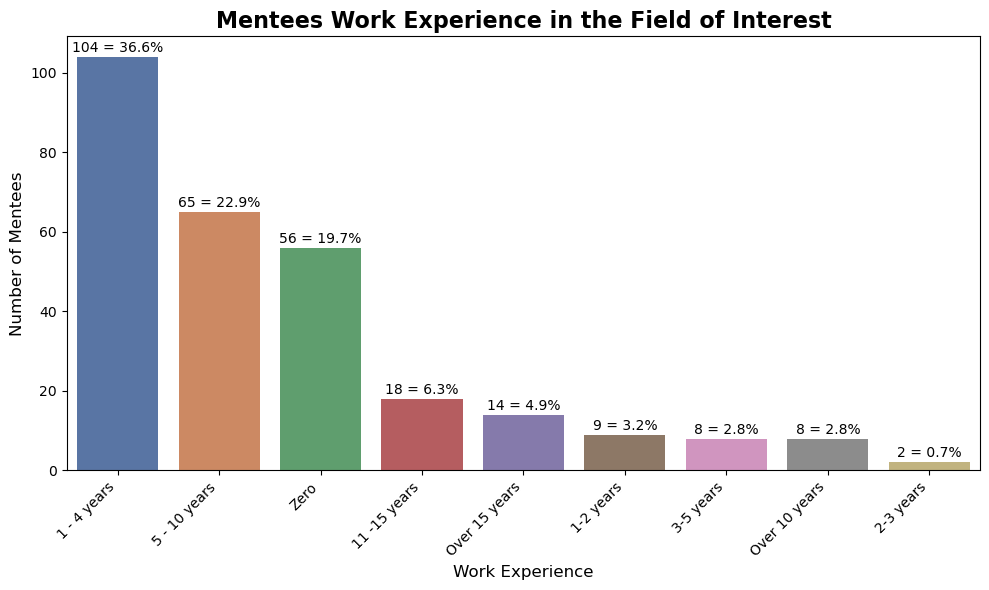

In [17]:
# Clean and remove NaNs
unique_mentees["work_experience"] = unique_mentees["work_experience"].astype(str).str.strip()
experience_counts = unique_mentees["work_experience"]
experience_counts = experience_counts[experience_counts.str.lower() != "nan"]  # Remove string 'nan'

# Count mentees by work experience
experience_counts = experience_counts.value_counts()
total_mentees = experience_counts.sum()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=experience_counts.index, y=experience_counts.values, palette="deep")

# Add annotations: number = percentage
for i, val in enumerate(experience_counts.values):
    pct = val / total_mentees * 100
    ax.text(i, val + 0.5, f"{val} = {pct:.1f}%", ha="center", va="bottom", fontsize=10)

# Styling
plt.title("Mentees Work Experience in the Field of Interest", fontsize=16, fontweight="bold")
plt.xlabel("Work Experience", fontsize=12)
plt.ylabel("Number of Mentees", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("mentees_work_experience.png", dpi=300, bbox_inches='tight')
plt.show()

### Mapping Mentor Expertise: The Experience Landscape

In this next phase of our analysis, we're shifting our focus to the mentors themselves - specifically examining the depth of experience they bring to our program.

By standardizing how we categorize work experience (transforming varied descriptions into consistent categories), we gain a clear picture of our mentor pool's professional maturity. This visualization reveals not just how many years our mentors have invested in their fields, but the distribution of expertise levels available to support our mentees.

Understanding this distribution is crucial - it helps us identify whether we have sufficient experienced mentors to guide our mentees at various career stages. A healthy mentoring ecosystem requires balanced representation across experience levels to ensure mentees receive guidance from professionals who understand their unique career position.

This analysis will inform our mentor recruitment strategy and help us create optimal mentor-mentee pairings based on experience alignment.

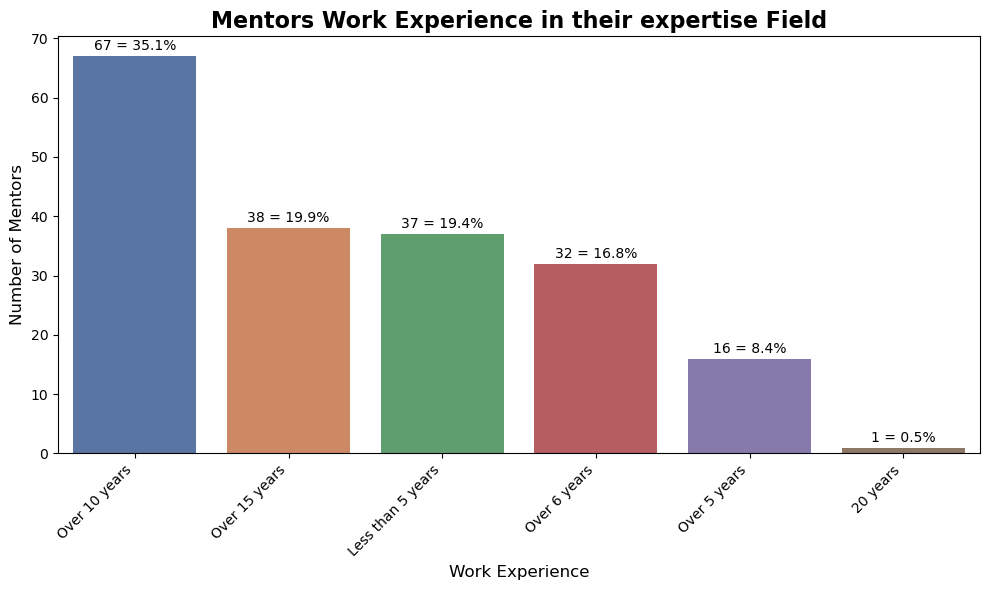

In [18]:
# Work experience of mentors in their expertise field.
# Always clean first
unique_mentors["work_experience"] = unique_mentors["work_experience"].astype(str).str.strip()

# Define replacements
replacements = {
    '2 years': 'Less than 5 years',
    'Over 10 years, 16 years in different products': 'Over 15 years',
    'I have been a freelancer photographer for 14 years': 'Over 10 years',
    "It's almost 10 years, which is closer to 10 than 6": 'Over 6 years',
    '5 years at least': 'Over 5 years'
}

# Apply replacements with fallback to original
unique_mentors["work_experience"] = unique_mentors["work_experience"].map(
    lambda x: replacements.get(x, x)
)


experience_counts = unique_mentors["work_experience"]
experience_counts = experience_counts[experience_counts.str.lower() != "nan"]  # Remove string 'nan'

# Count mentees by work experience
experience_counts = experience_counts.value_counts()
total_mentors = experience_counts.sum()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=experience_counts.index, y=experience_counts.values, palette="deep")

# Add annotations using style: counts = percentage
for i, val in enumerate(experience_counts.values):
    pct = val / total_mentors * 100
    ax.text(i, val + 0.5, f"{val} = {pct:.1f}%", ha="center", va="bottom", fontsize=10)

# Styling
plt.title("Mentors Work Experience in their expertise Field", fontsize=16, fontweight="bold")
plt.xlabel("Work Experience", fontsize=12)
plt.ylabel("Number of Mentors", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("Mentors Work Experience in their expertise Field.png", dpi=300, bbox_inches='tight')
plt.show()


### Mapping Our Mentee Footprint Across Finland

Next, we're exploring the geographical distribution of our mentees throughout Finland. This analysis visualizes where our program participants are located, highlighting the concentration of mentees across different cities.

Understanding this regional spread provides critical insights for our program's reach and accessibility. It helps us identify strongholds where our program has gained traction, as well as areas with potential for growth and increased engagement.

This geographical mapping will guide our regional outreach strategies, help us plan location-specific events, and ensure we're providing equitable opportunities for mentorship across the country. By knowing where our mentees are located, we can better tailor our resources and support to meet the unique needs of each community.

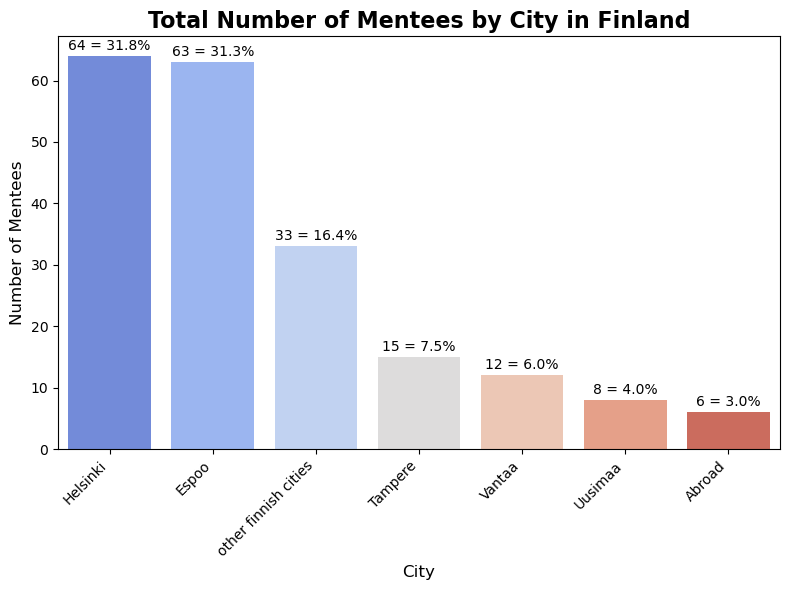

In [19]:
# Clean city names and remove NaNs
unique_mentees["city_finland"] = unique_mentees["city_finland"].astype(str).str.strip()
city_counts = unique_mentees["city_finland"]
city_counts = city_counts[city_counts.str.lower() != "nan"]  # Remove string 'nan'

# Count mentees by city
city_counts = city_counts.value_counts()
total_mentees = city_counts.sum()

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=city_counts.index, y=city_counts.values, hue=city_counts.index, palette="coolwarm", dodge=False)

# Add annotations: number = percentage
for i, val in enumerate(city_counts.values):
    pct = val / total_mentees * 100
    ax.text(i, val + 0.5, f"{val} = {pct:.1f}%", ha="center", va="bottom", fontsize=10)

# Labels and styling
plt.title("Total Number of Mentees by City in Finland", fontsize=16, fontweight="bold")
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Mentees", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend([],[], frameon=False)  # Remove legend from hue
plt.tight_layout()
plt.savefig('Total Number of Mentees by City in Finland.png', dpi=300, bbox_inches='tight')
plt.show()


### Uncovering the Educational Landscape of Our Mentees

In this analysis, we're examining the educational backgrounds of our mentee community. By visualizing the distribution of education levels among participants, we gain valuable insights into the academic diversity within our program.

This educational profile helps us understand the knowledge foundations our mentees bring to their professional journeys. Such insights allow us to tailor mentoring approaches that complement different educational backgrounds and create learning resources that resonate with various academic experiences.

Understanding this distribution also enables us to evaluate whether our program is accessible across educational spectrums and identify any underrepresented groups that might benefit from targeted outreach. This knowledge shapes how we structure our mentoring relationships and develop programming that addresses the unique needs of mentees at each educational milestone.

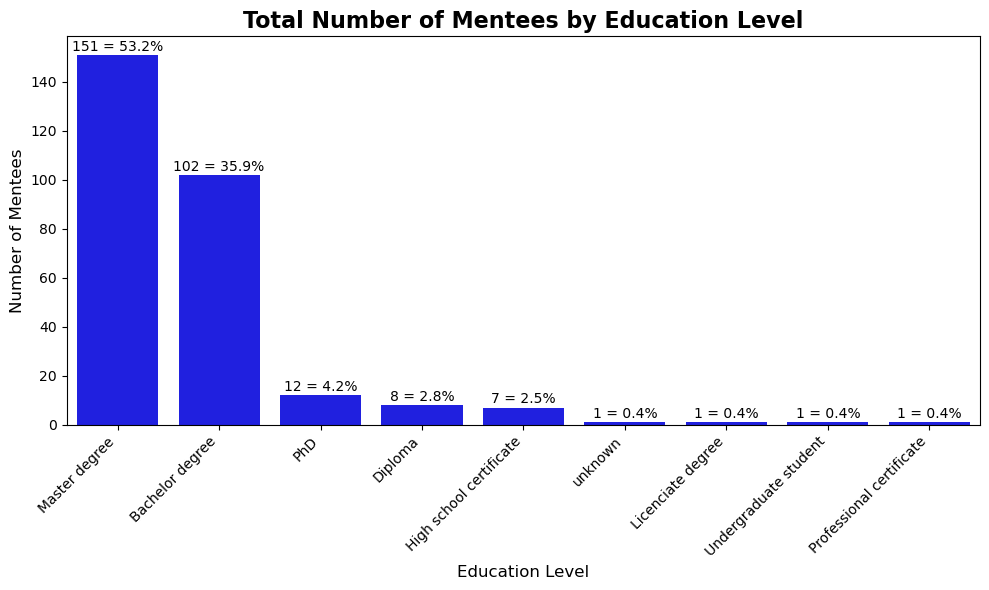

In [20]:
# Clean and remove NaNs from education_level
unique_mentees["education_level"] = unique_mentees["education_level"].astype(str).str.strip()
edu_counts = unique_mentees["education_level"]
edu_counts = edu_counts[edu_counts.str.lower() != "nan"]  # Remove string 'nan'

# Count occurrences
edu_counts = edu_counts.value_counts()
total_mentees = edu_counts.sum()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=edu_counts.index, y=edu_counts.values, color="blue")

# Add annotations: number = percentage
for i, val in enumerate(edu_counts.values):
    pct = val / total_mentees * 100
    ax.text(i, val + 0.5, f"{val} = {pct:.1f}%", ha="center", va="bottom", fontsize=10)

# Labels and styling
plt.title("Total Number of Mentees by Education Level", fontsize=16, fontweight="bold")
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Number of Mentees", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('Total Number of Mentees by Education Level.png', dpi=300, bbox_inches='tight')
plt.show()


### 🧠 Exploring Mentees' Expectations: What Kind of Help Do They Seek?

To better tailor the mentorship program and ensure it addresses mentees’ real needs, it's important to analyze the **open-ended responses** they provided about the help they expect from the program.

This step uses **natural language processing (NLP)** and **clustering** to uncover key themes in the mentees' expectations:

- We first **clean and standardize** the text to make it machine-readable.
- Then, we **vectorize** the text using TF-IDF to capture important terms while reducing noise.
- We apply **K-Means clustering** to automatically group similar responses together, revealing major themes.
- Finally, we inspect the **top keywords** and **sample responses** in each cluster to understand what kind of support mentees are most frequently looking for.

This analysis helps:
- Identify common expectations across the cohort.
- Inform mentors and coordinators about mentees’ needs.
- Highlight gaps where new types of support may be necessary.

Let's dive into what mentees really want!


Cluster 0: increase, emotional, provide, support, contacts, cvcover, assist, letter, professional, network
Cluster 1: increase, network, contacts, professional, jobsinternships, look, finnish, feel, field, fields
Cluster 2: job, guidance, opportunities, help, cv, work, networking, field, connections, tips
Cluster 3: increase, cvcover, assist, letter, contacts, professional, network, jobsinternships, look, foreign
Cluster 4: jobsinternships, look, feedback, field, fields, finance, finding, finland, finnish, fit


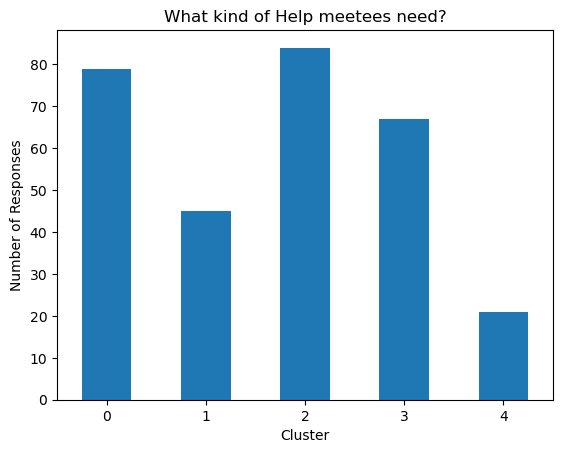


Cluster 0 sample responses:

Increase your network, Increase your profession...
                         Provide emotional support
Increase your network, Increase your profession...
Increase your network, Increase your profession...
Increase your network, Increase your profession...

Cluster 1 sample responses:

Increase your network, Increase your profession...
Increase your professional contacts, Look for j...
Increase your network, Increase your profession...
Increase your network, Increase your profession...
Increase your network, Increase your profession...

Cluster 2 sample responses:

                      How to get into the Industry
Insight on how to get English speaking jobs whi...
         Find a job and adopt the finnish culture 
I need motivations to improve my confidence. I ...
Tips on how to make my job application strategy...

Cluster 3 sample responses:

Increase your professional contacts, Assist wit...
Increase your network, Assist with CV/Cover letter
Increase your

In [21]:
# Clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    return text

mentees_all_nodup['cleaned_help'] = mentees_all_nodup['expected_help'].apply(clean_text)

# 2. Vectorize the cleaned text
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(mentees_all_nodup['cleaned_help'])

# Use K-Means clustering to find themes
k = 5  # You can experiment with this number
kmeans = KMeans(n_clusters=k, random_state=42)
mentees_all_nodup['help_cluster'] = kmeans.fit_predict(X)

# (Optional) Review top terms in each cluster
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(k):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i}: {', '.join(top_terms)}")

# (Optional) Plot how many responses are in each cluster
mentees_all_nodup['help_cluster'].value_counts().sort_index().plot(kind='bar')
plt.title("What kind of Help meetees need?")
plt.xlabel("Cluster")
plt.ylabel("Number of Responses")
plt.xticks(rotation=0)
plt.savefig('What kind of Help meetees need.png', dpi=300, bbox_inches='tight')
plt.show()

for i in range(k):
    print(f"\nCluster {i} sample responses:\n")
    print(mentees_all_nodup[mentees_all_nodup['help_cluster'] == i]['expected_help'].sample(5, random_state=42).to_string(index=False))


### 📊 Tracking Mentorship Demand and Supply Over Time by Gender

In this next section, we take a deeper look into the **evolution of the mentoring program over time**, focusing on two important dimensions:

1. **Number of mentees vs. mentors**
2. **Gender distribution in each group**

By grouping participants by **year**, **round**, and **gender**, we are able to:
- Visualize trends in **program growth** and **participation over time**
- Assess **demand (mentees)** and **supply (mentors)** in each round
- Identify **gender imbalances** or shifts across rounds
- Guide planning efforts for future rounds based on historical patterns

This kind of insight is essential for program organizers to ensure equitable access, balanced mentor-to-mentee ratios, and targeted recruitment strategies where needed.

Let’s now explore the mentoring landscape across rounds and years.


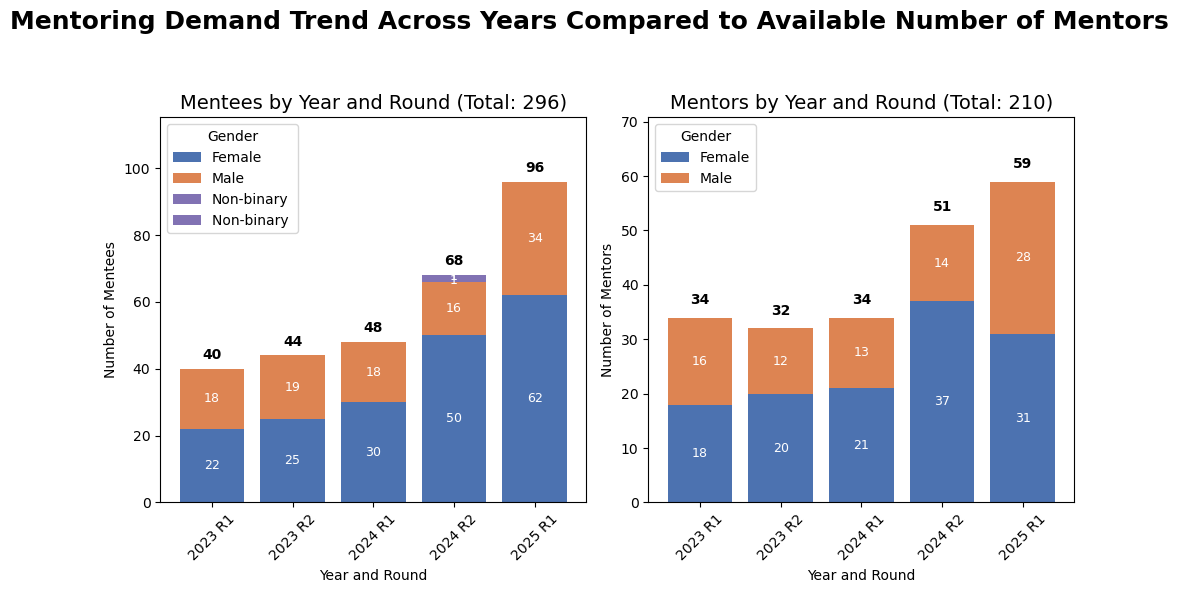

In [22]:
# === Group and pivot mentees by year, round, and gender ===
mentees_grouped = (
    mentees_all_nodup.groupby(["year", "round", "gender"])["multi_id"]
    .nunique()
    .reset_index()
)
mentees_grouped["label"] = mentees_grouped["year"].astype(str) + " R" + mentees_grouped["round"].astype(str)
mentees_pivot = mentees_grouped.pivot(index="label", columns="gender", values="multi_id").fillna(0)

# === Group and pivot mentors by year, round, and gender ===
mentors_grouped = (
    mentors_all_nodup.groupby(["year", "round", "gender"])["multi_id"]
    .nunique()
    .reset_index()
)
mentors_grouped["label"] = mentors_grouped["year"].astype(str) + " R" + mentors_grouped["round"].astype(str)
mentors_pivot = mentors_grouped.pivot(index="label", columns="gender", values="multi_id").fillna(0)

# === Define color map ===
gender_color_map = {
    "Female": "#4C72B0",
    "Male": "#DD8452",
    "Other": "#55A868",
    "Non-binary": "#8172B3",
    "Prefer not to say": "#937860",
}

default_colors = list(gender_color_map.values())
available_genders_mentees = mentees_pivot.columns.tolist()
available_genders_mentors = mentors_pivot.columns.tolist()

# === Plot ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle("Mentoring Demand Trend Across Years Compared to Available Number of Mentors", fontsize=18, fontweight='bold')

# === Mentees Plot ===
bottom_vals = [0] * len(mentees_pivot)
x_labels = mentees_pivot.index
max_mentee_total = 0

for i, gender in enumerate(available_genders_mentees):
    heights = mentees_pivot[gender].values
    color = gender_color_map.get(gender, default_colors[i % len(default_colors)])
    ax1.bar(x_labels, heights, bottom=bottom_vals, label=gender, color=color)

    for j, val in enumerate(heights):
        if val > 0:
            ax1.text(j, bottom_vals[j] + val / 2, str(int(val)), ha='center', va='center', fontsize=9, color='white')
        bottom_vals[j] += val
        max_mentee_total = max(max_mentee_total, bottom_vals[j])

# Add total labels on top
for j, total in enumerate(bottom_vals):
    ax1.text(j, total + 2, str(int(total)), ha='center', va='bottom', fontsize=10, fontweight='bold')

ax1.set_ylim(0, max_mentee_total * 1.2)
ax1.set_title(f"Mentees by Year and Round (Total: {mentees_all_nodup['multi_id'].nunique()})", fontsize=14)
ax1.set_xlabel("Year and Round")
ax1.set_ylabel("Number of Mentees")
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title="Gender")

# === Mentors Plot ===
bottom_vals = [0] * len(mentors_pivot)
x_labels = mentors_pivot.index
max_mentor_total = 0

for i, gender in enumerate(available_genders_mentors):
    heights = mentors_pivot[gender].values
    color = gender_color_map.get(gender, default_colors[i % len(default_colors)])
    ax2.bar(x_labels, heights, bottom=bottom_vals, label=gender, color=color)

    for j, val in enumerate(heights):
        if val > 0:
            ax2.text(j, bottom_vals[j] + val / 2, str(int(val)), ha='center', va='center', fontsize=9, color='white')
        bottom_vals[j] += val
        max_mentor_total = max(max_mentor_total, bottom_vals[j])

# Add total labels on top
for j, total in enumerate(bottom_vals):
    ax2.text(j, total + 2, str(int(total)), ha='center', va='bottom', fontsize=10, fontweight='bold')

ax2.set_ylim(0, max_mentor_total * 1.2)
ax2.set_title(f"Mentors by Year and Round (Total: {mentors_all_nodup['multi_id'].nunique()})", fontsize=14)
ax2.set_xlabel("Year and Round")
ax2.set_ylabel("Number of Mentors")
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title="Gender")

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig('Mentoring Demand Trend Across Years Compared to Available Number of Mentors.png', dpi=300, bbox_inches='tight')
plt.show()


### 🧭 Matching People by Career Interests Using AI

Now we dive into an important step for ensuring the **effectiveness and relevance of mentor-mentee matching**: aligning participants based on their career interests.

We do this in several steps:

1. **Use a pre-trained language model** to understand free-text responses about desired career fields (mentees) and areas of expertise (mentors).
2. **Classify each participant** into one of several standardized career categories (e.g., STEM, Business, Healthcare).
3. **Compare and visualize** how many mentees and mentors exist in each category across years and rounds.

Why is this important?
- It helps **measure alignment between mentee needs and mentor expertise**.
- Reveals **gaps**—categories where demand exceeds supply, or vice versa.
- Informs **future recruitment efforts** to better balance supply and demand across fields.

This data-driven approach gives structure to messy real-world input, making the matching process more equitable and effective.


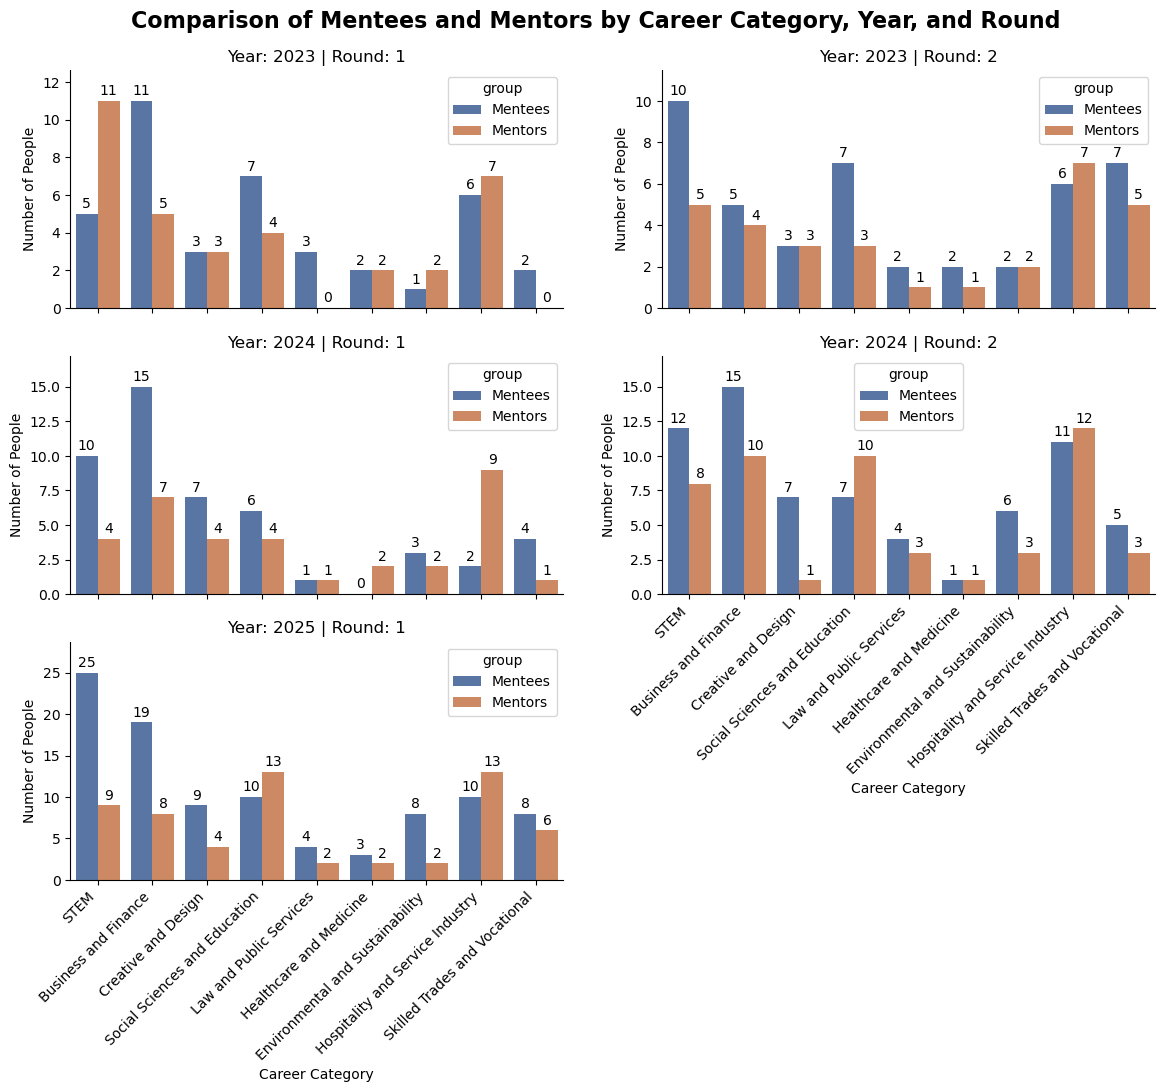

In [23]:

from itertools import product

# === Load model ===
model = SentenceTransformer('all-MiniLM-L6-v2')

# === Career categories ===
career_categories = {
    "STEM": "Careers in science, technology, engineering, mathematics, statistics, data science, computer science, web development, DevOps engineering, tech, QA, IT, ML, and AI",
    "Business and Finance": "Jobs in business, management, accounting, and finance",
    "Creative and Design": "Artistic and creative professions like design, media, and writing",
    "Social Sciences and Education": "Fields involving psychology, sociology, teaching, and human services",
    "Law and Public Services": "Legal professions and public sector jobs like law enforcement and public administration",
    "Healthcare and Medicine": "Medical fields including nursing, doctors, and public health",
    "Environmental and Sustainability": "Green jobs related to environment, energy, and sustainability",
    "Hospitality and Service Industry": "Customer-facing jobs such as tourism, hotels, restaurants, and services",
    "Skilled Trades and Vocational": "Manual and technical trades like construction, mechanics, and electricians"
}

category_names = list(career_categories.keys())
category_descriptions = list(career_categories.values())
category_embeddings = model.encode(category_descriptions, convert_to_tensor=True)

# === Classify mentees ===
mentees_valid = mentees_all_nodup.dropna(subset=["desired_field"]).copy()
desired_embeddings = model.encode(mentees_valid["desired_field"].astype(str).tolist(), convert_to_tensor=True)
cosine_scores_mentees = util.cos_sim(desired_embeddings, category_embeddings)
top_indices_mentees = np.argmax(cosine_scores_mentees.cpu().numpy(), axis=1)
mentees_valid["classified_category"] = [category_names[i] for i in top_indices_mentees]
mentees_all_nodup["classified_category"] = np.nan
mentees_all_nodup.loc[mentees_valid.index, "classified_category"] = mentees_valid["classified_category"]

# === Classify mentors ===
mentors_valid = mentors_all_nodup.dropna(subset=["expertise_field"]).copy()
expertise_embeddings = model.encode(mentors_valid["expertise_field"].astype(str).tolist(), convert_to_tensor=True)
cosine_scores_mentors = util.cos_sim(expertise_embeddings, category_embeddings)
top_indices_mentors = np.argmax(cosine_scores_mentors.cpu().numpy(), axis=1)
mentors_valid["classified_category"] = [category_names[i] for i in top_indices_mentors]
mentors_all_nodup["classified_category"] = np.nan
mentors_all_nodup.loc[mentors_valid.index, "classified_category"] = mentors_valid["classified_category"]

# === Group counts by year and round ===
mentees_grouped = mentees_all_nodup.groupby(["year", "round", "classified_category"]).size().reset_index(name="count")
mentees_grouped["group"] = "Mentees"

mentors_grouped = mentors_all_nodup.groupby(["year", "round", "classified_category"]).size().reset_index(name="count")
mentors_grouped["group"] = "Mentors"

combined = pd.concat([mentees_grouped, mentors_grouped], ignore_index=True)

# === Ensure all combinations exist ===
all_years = combined["year"].dropna().unique()
all_rounds = combined["round"].dropna().unique()
all_categories = category_names
all_groups = ["Mentees", "Mentors"]

full_index = pd.DataFrame(product(all_years, all_rounds, all_categories, all_groups),
                          columns=["year", "round", "classified_category", "group"])
combined = pd.merge(full_index, combined,
                    on=["year", "round", "classified_category", "group"],
                    how="left").fillna(0)

# === Filter out year 2025 round 2 ===
plot_data = combined[~((combined["year"] == 2025) & (combined["round"] == 2))].copy()

# === Get year-round combinations for plotting ===
plot_combinations = plot_data[["year", "round"]].drop_duplicates().sort_values(by=["year", "round"]).reset_index(drop=True)

# === Create 3x2 plot layout ===
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharey=False)
axes = axes.flatten()

# === Plot each combination ===
for i, (year, rnd) in enumerate(plot_combinations.values):
    ax = axes[i]
    subset = plot_data[(plot_data["year"] == year) & (plot_data["round"] == rnd)]

    sns.barplot(
        data=subset,
        x="classified_category", y="count", hue="group",
        ax=ax,
        palette=["#4C72B0", "#DD8452"]
    )

    # Remove top and right spines to gain space and improve aesthetics
    sns.despine(ax=ax, top=True, right=True)

    ax.set_title(f"Year: {year} | Round: {rnd}")
    ax.set_ylabel("Number of People")

    # Show x-labels only for the last row of each column
    if i == 3 or i == 4:  # bottom of column 1 (0,1,2) and column 2 (3,4)
        ax.set_xticks(np.arange(len(category_names)))
        ax.set_xticklabels(category_names, rotation=45, ha='right')
        ax.set_xlabel("Career Category")
    else:
        ax.set_xticklabels([])
        ax.set_xlabel("")

    # Adjust y-limits for annotations
    max_height = 0
    for container in ax.containers:
        bar_heights = [bar.get_height() for bar in container]
        if bar_heights:
            max_height = max(max_height, max(bar_heights))
    
    ax.set_ylim(0, max_height * 1.15)

    # Add bar labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', padding=2, fontsize=10)

# === Remove unused axes ===
for j in range(len(plot_combinations), len(axes)):
    fig.delaxes(axes[j])

# === Final layout ===
fig.suptitle("Comparison of Mentees and Mentors by Career Category, Year, and Round", fontsize=16, fontweight='bold')
fig.subplots_adjust(hspace=0.2, wspace=0.2, top=0.92)
plt.savefig('Comparison of Mentees and Mentors by Career Category, Year, and Round.png', dpi=300, bbox_inches='tight')
plt.show()


### 🗣️ Sample Responses by Career Category

In this section, we print out real examples of what mentees said they want to do ("desired_field") and what mentors said they are experienced in ("expertise_field") — **organized by the career categories we classified earlier**.

Why is this useful?

- It **brings the data to life**: instead of just counts or graphs, we can hear the actual voices of participants.
- It helps **validate our category classifications** — do the responses in each group actually sound like they belong there?
- It offers **qualitative insight** into what people are aspiring to or offering, which can help with storytelling, outreach, or refining the taxonomy.

We sample a few mentees and mentors per category to keep it manageable, but representative.


In [24]:
print("\n===== SAMPLE MENTEE RESPONSES BY CATEGORY =====")
for category in career_categories:
    samples = mentees_all_nodup[mentees_all_nodup["classified_category"] == category]["desired_field"].dropna()
    if not samples.empty:
        print(f"\n--- {category} ---")
        for entry in samples.sample(min(3, len(samples)), random_state=42):
            print(f"- {entry}")

print("\n===== SAMPLE MENTOR RESPONSES BY CATEGORY =====")
for category in career_categories:
    samples = mentors_all_nodup[mentors_all_nodup["classified_category"] == category]["expertise_field"].dropna()
    if not samples.empty:
        print(f"\n--- {category} ---")
        for entry in samples.sample(min(8, len(samples)), random_state=42):
            print(f"- {entry}")



===== SAMPLE MENTEE RESPONSES BY CATEGORY =====

--- STEM ---
- IT, software Development or related fields
- IT: IT support, helpdesk, operation and maintenance, asset management, system and network administration
- Information Technology 

--- Business and Finance ---
- Marketing projects coordinator 
- Marketing, sales, project management, startups/corporations
- Accounting 

--- Creative and Design ---
- I currently do not have a desired field due to employment uncertainty but I would like to work where I can use my passion and creativity, learn constantly while interacting with others and most importantly, somewhere where I can make a visible impact.
- Architect full time
- IT

--- Social Sciences and Education ---
- Chemistry/Research and development
- I m a sociologist, with experiences  also in other fields....
- Education and Humanities (academia)

--- Law and Public Services ---
- Transportation or urban planning
- NGO or other governmental organization 
- Administrative divi

# Analysing the pre_post assessment data for the year 2023 and 2024

### 📊 Pre-Post Assessment: Employment Status Analysis

We’re now moving into analyzing **pre- and post-assessment survey data** to understand how participants' **employment status** changed before and after the program, across both 2023 and 2024.

#### What we’re doing here:

1. **Load the data** from Excel files for both years, pre- and post-program.
2. **Extract and clean employment status** fields so they’re ready for analysis.
3. **Count the number of responses per employment status** (e.g., “Employed”, “Unemployed”, “Student”) in each dataset.
4. **Visualize** these distributions in a set of 2x2 bar plots:
   - Pre-2023
   - Post-2023
   - Pre-2024
   - Post-2024

Each bar is labeled not only with the count of respondents but also the **percentage** of total respondant they represent, which helps in comparing shifts over time more intuitively.

#### Why this is useful:

This visualization helps us answer key impact questions like:
- Are more participants employed after the program?
- Are unemployment levels dropping?
- How consistent are these outcomes year to year?

It gives us a **quick, visual overview** of how the program may be influencing employment outcomes for mentees — one of the core goals of many mentoring initiatives.


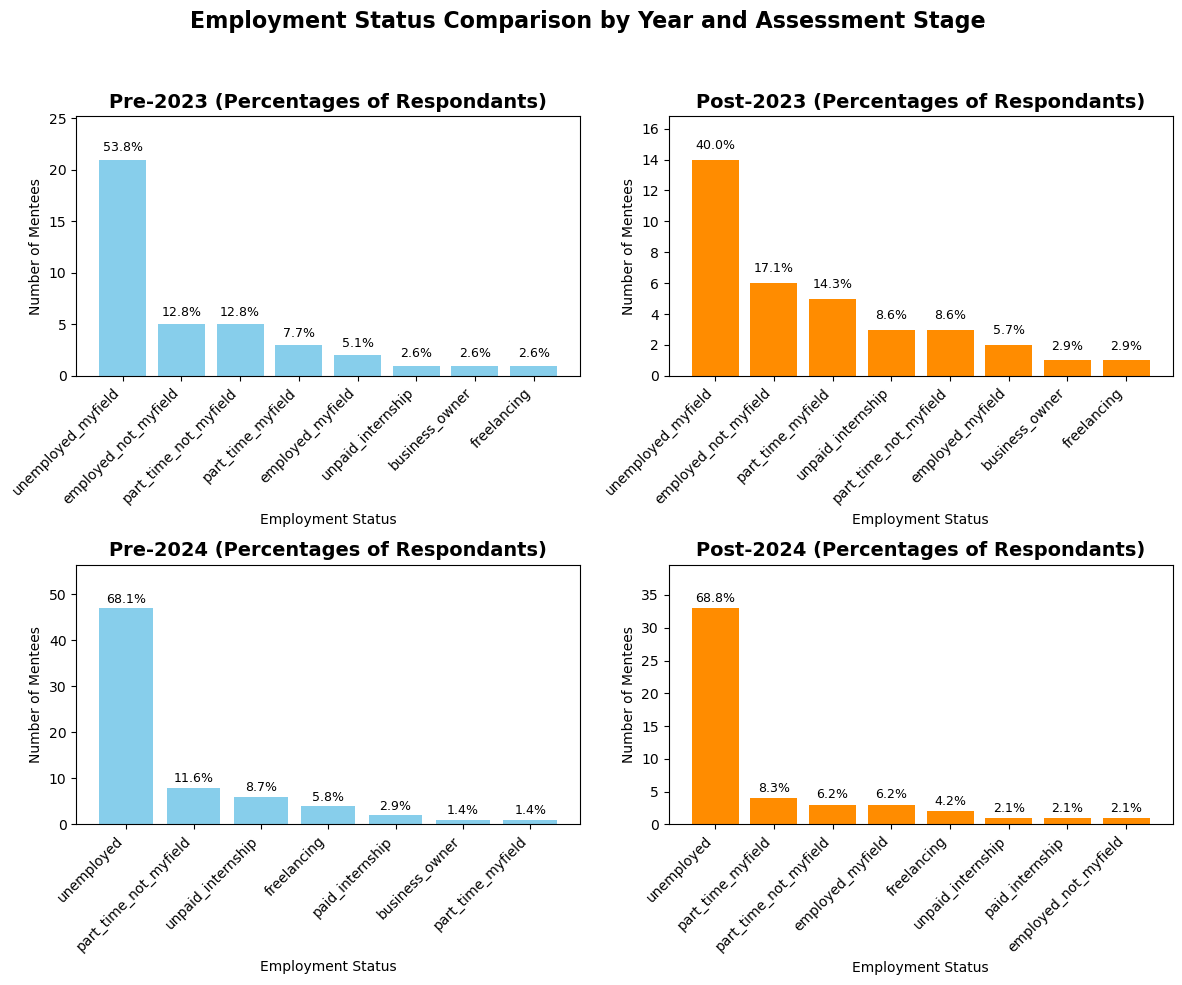

In [25]:
# === Load Data ===
pre_2023_all = pd.read_excel("pre_assessment_2023_all.xlsx")
post_2023_all = pd.read_excel("post_assessment_2023_all.xlsx")
pre_2024_all = pd.read_excel("pre_assessment_2024_all.xlsx")
post_2024_all = pd.read_excel("post_assessment_2024_all.xlsx")

# === Extract and Clean Employment Status ===
pre_2023_all["employment_status"] = pre_2023_all["employment_status_standardized"].astype(str).str.strip()
post_2023_all["employment_status"] = post_2023_all["employment_status_after"].astype(str).str.strip()
pre_2024_all["employment_status"] = pre_2024_all["employment_status_before"].astype(str).str.strip()
post_2024_all["employment_status"] = post_2024_all["employment_status_after"].astype(str).str.strip()

# === Count Frequencies Separately ===
pre_2023 = pre_2023_all["employment_status"].value_counts()
post_2023 = post_2023_all["employment_status"].value_counts()
pre_2024 = pre_2024_all["employment_status"].value_counts()
post_2024 = post_2024_all["employment_status"].value_counts()

# === Sort Each Group Individually ===
pre_2023 = pre_2023.sort_values(ascending=False)
post_2023 = post_2023.sort_values(ascending=False)
pre_2024 = pre_2024.sort_values(ascending=False)
post_2024 = post_2024.sort_values(ascending=False)

# === Set up Subplots ===
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
datasets = [
    ("Pre-2023 (Percentages of Respondants)", pre_2023, axes[0, 0], 'skyblue'),
    ("Post-2023 (Percentages of Respondants)", post_2023, axes[0, 1], 'darkorange'),
    ("Pre-2024 (Percentages of Respondants)", pre_2024, axes[1, 0], 'skyblue'),
    ("Post-2024 (Percentages of Respondants)", post_2024, axes[1, 1], 'darkorange')
]

# === Plot Each Dataset ===
for title, data, ax, color in datasets:
    categories = data.index.tolist()
    values = data.values
    x = np.arange(len(categories))

    ax.bar(x, values, color=color)
    total = values.sum()

    for i, count in enumerate(values):
        pct = count / total * 100
        ax.text(x[i], count + 0.5, f"{pct:.1f}%", ha='center', va='bottom', fontsize=9)

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel("Number of Mentees")
    ax.set_xlabel("Employment Status")
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45, ha='right')
    ax.set_ylim(0, max(values) * 1.2)

# === Overall Title and Layout ===
fig.suptitle("Employment Status Comparison by Year and Assessment Stage", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('Employment Status Comparison by Year and Assessment Stage.png', dpi=300, bbox_inches='tight')
plt.show()


### 🤝 Insight: Growth in Participants' Professional Networks

In this next analysis, we're focusing on how mentees' **professional networks** have changed before and after participating in the program — specifically, by analyzing their **self-reported number of professional contacts**.

Each bar in the vizualization is annotated with both the **absolute count** and **percentage** of mentees who gave that response.

#### Why this is useful:

Professional networks are a key indicator of a participant's **career readiness** and **social capital**. By visualizing these pre/post distributions:
- We can assess whether mentees **gained professional contacts** through the program.
- We get a clear picture of how **network-building outcomes differ between years**.
- It's a tangible way to evaluate the **program's effectiveness in improving professional exposure** — a core objective in mentorship-based interventions.

If we observe a rightward shift (toward more contacts) post-program, it's a strong signal that the initiative is having meaningful impact.


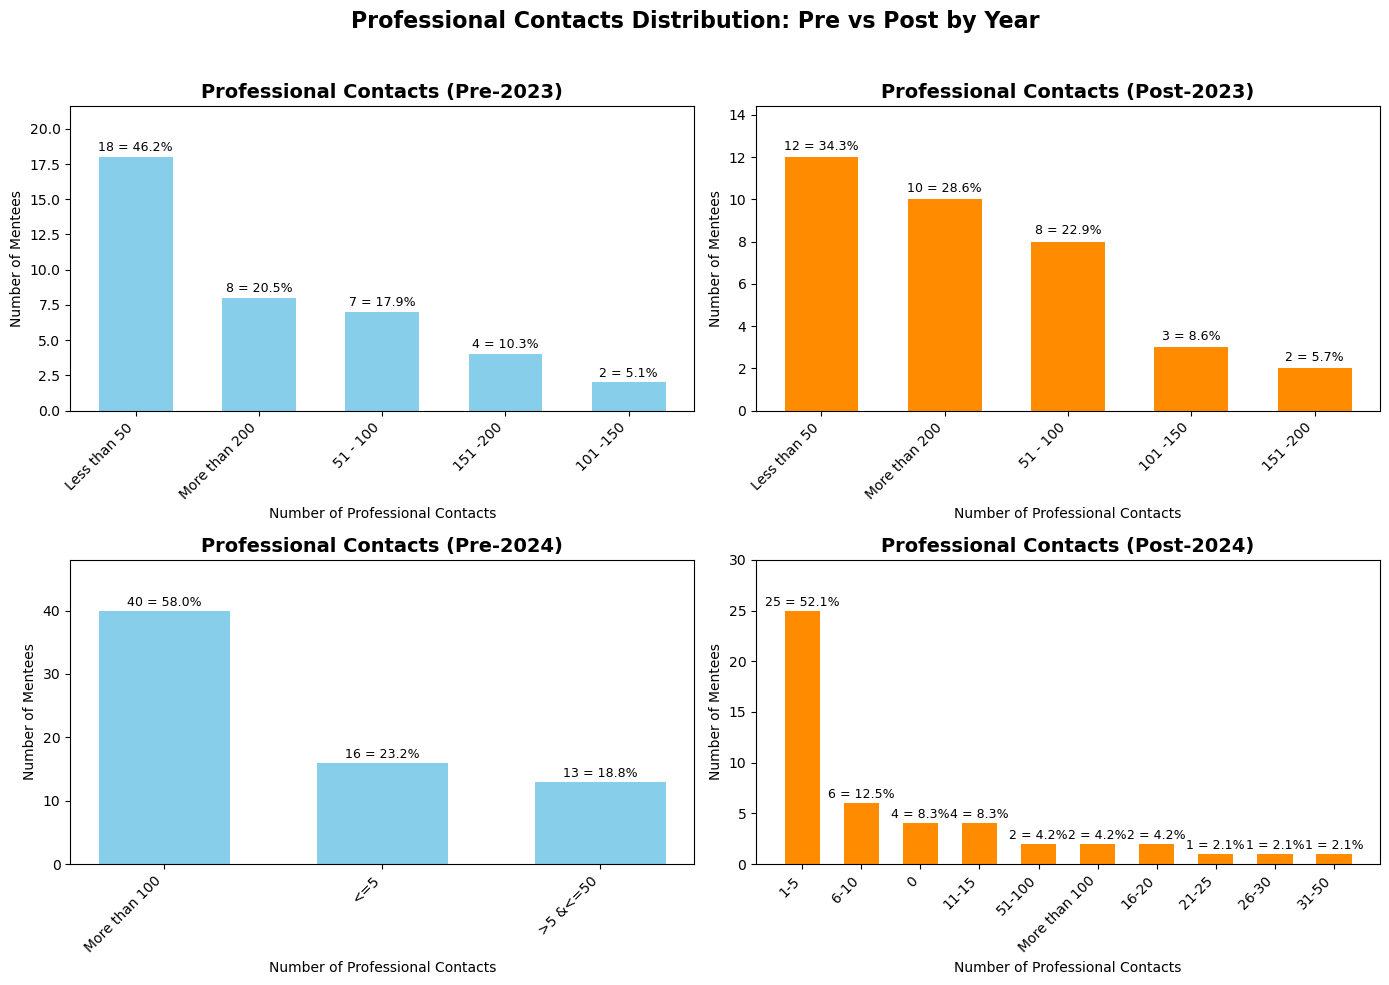

In [26]:
# === Clean and standardize the 'professional_contacts' column ===
for df in [pre_2023_all, post_2023_all, pre_2024_all, post_2024_all]:
    df["professional_contacts"] = df["professional_contacts"].astype(str).str.strip()

# === Count values for each group separately ===
pre_2023_counts = pre_2023_all["professional_contacts"].value_counts()
post_2023_counts = post_2023_all["professional_contacts"].value_counts()
pre_2024_counts = pre_2024_all["professional_contacts"].value_counts()
post_2024_counts = post_2024_all["professional_contacts"].value_counts()

# === Set up the 2x2 subplot grid ===
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Wider figure for long labels
bar_width = 0.6

# === Plotting function ===
def plot_subplot(ax, counts, title, color):
    categories = counts.index.tolist()
    total = counts.sum()
    x = np.arange(len(categories))
    bars = ax.bar(x, counts.values, width=bar_width, color=color)

    # Annotate each bar with number and percentage (black text above the bar, but inside the plot)
    for i, bar in enumerate(bars):
        val = counts.values[i]
        pct = (val / total) * 100 if total else 0
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.2,  # Slightly above the bar, but still within the figure
            f"{val} = {pct:.1f}%",
            ha='center',
            va='bottom',
            fontsize=9,
            color='black'
        )

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel("Number of Mentees")
    ax.set_xlabel("Number of Professional Contacts")
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45, ha='right')
    ax.set_ylim(0, max(counts.values) * 1.2)  # Extend y-limit so text fits inside the plot

# === Plot each of the 4 groups ===
plot_subplot(axs[0, 0], pre_2023_counts, "Professional Contacts (Pre-2023)", "skyblue")
plot_subplot(axs[0, 1], post_2023_counts, "Professional Contacts (Post-2023)", "darkorange")
plot_subplot(axs[1, 0], pre_2024_counts, "Professional Contacts (Pre-2024)", "skyblue")
plot_subplot(axs[1, 1], post_2024_counts, "Professional Contacts (Post-2024)", "darkorange")

# === Final layout tweaks ===
plt.suptitle("Professional Contacts Distribution: Pre vs Post by Year", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 🎯 Insight: Growth in Mentees’ Confidence to Pitch Themselves

This part of the analysis focuses on how **confident mentees feel about pitching themselves to potential employers** before and after the program.

#### What this code is doing:

1. **Cleans** the `prepared_to_pitch` column across all pre- and post-assessment datasets.
2. **Counts** the responses in each dataset — for both 2023 and 2024, before and after the program.
3. **Aligns the response categories** so we can accurately compare pre vs post even if some categories are missing from one group.
4. **Plots the distributions** using side-by-side bar charts in a 2x2 grid:
   - Pre- and Post-2023
   - Pre- and Post-2024

Each bar represents the number of mentees who selected a particular confidence level (e.g., "Not at all", "Somewhat", "Very prepared"), and annotations show the corresponding percentages.

#### Why this is useful:

Confidence in pitching oneself is a **key employability skill** — it's about being able to articulate one’s strengths, goals, and value to potential employers. If the program is effective, we would expect:
- A **shift toward higher confidence levels** post-program.
- A **reduction in "Not at all prepared"** responses.

This visualization helps answer:
- *Is the program increasing participants’ readiness to pursue opportunities?*
- *Is this improvement consistent across cohorts (2023 vs 2024)?*

It gives us a direct window into the **internal transformation** participants may be experiencing — not just what they do, but how ready they *feel*.


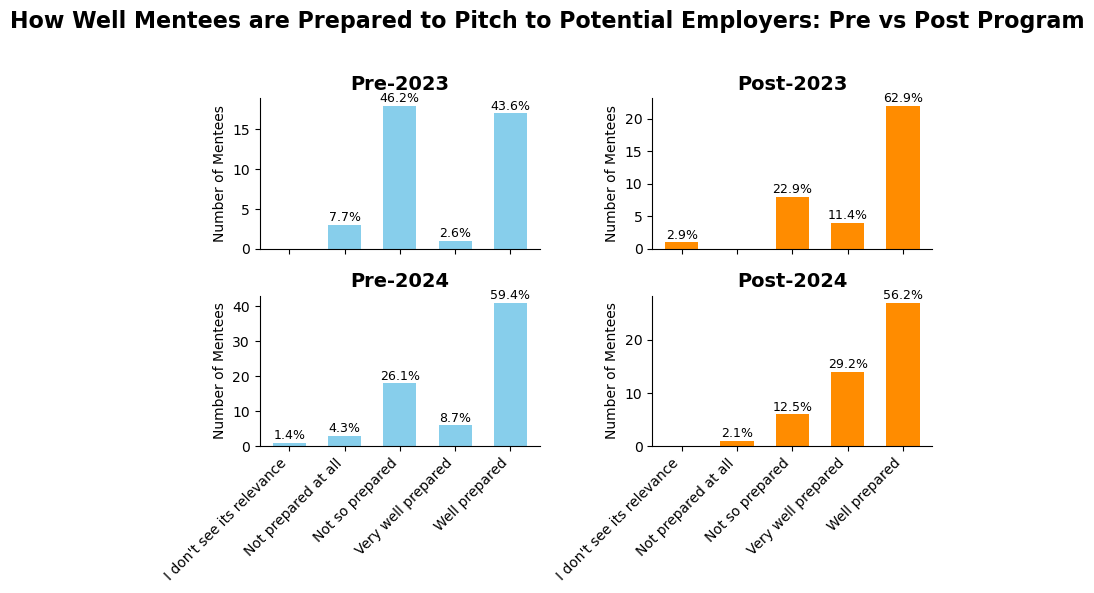

In [27]:
# === Clean the "prepared_to_pitch" column ===
for df in [pre_2023_all, post_2023_all, pre_2024_all, post_2024_all]:
    df["prepared_to_pitch"] = df["prepared_to_pitch"].astype(str).str.strip()

# === Count values for each dataset ===
pre_2023_counts = pre_2023_all["prepared_to_pitch"].value_counts()
post_2023_counts = post_2023_all["prepared_to_pitch"].value_counts()
pre_2024_counts = pre_2024_all["prepared_to_pitch"].value_counts()
post_2024_counts = post_2024_all["prepared_to_pitch"].value_counts()

# === Align categories and counts ===
def align_counts(counts1, counts2):
    all_categories = sorted(set(counts1.index).union(set(counts2.index)))
    counts1_aligned = counts1.reindex(all_categories, fill_value=0)
    counts2_aligned = counts2.reindex(all_categories, fill_value=0)
    return counts1_aligned, counts2_aligned, all_categories

pre_2023_sorted, post_2023_sorted, cats_2023 = align_counts(pre_2023_counts, post_2023_counts)
pre_2024_sorted, post_2024_sorted, cats_2024 = align_counts(pre_2024_counts, post_2024_counts)

# === Plot setup ===
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
bar_width = 0.6

# === 6. Plotting function ===
def plot_single(ax, counts, title, color, total, categories, row_index):
    x = np.arange(len(categories))
    bars = ax.bar(x, counts.values, width=bar_width, color=color)

    for i, bar in enumerate(bars):
        if counts.values[i] > 0:
            pct = counts.values[i] / total * 100
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
                    f"{pct:.1f}%", ha='center', va='bottom', fontsize=9)

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel("Number of Mentees")
    ax.set_xticks(x)

    # Show x-labels only for the second row (bottom row)
    if row_index == 1:  # This is for the bottom row (index 1)
        ax.set_xticklabels(categories, rotation=45, ha='right')
    else:
        ax.set_xticklabels([])

    # Remove top and right spines for better layout
    sns.despine(ax=ax, top=True, right=True)

# === Generate subplots ===
plot_single(axs[0, 0], pre_2023_sorted, "Pre-2023", "skyblue", pre_2023_sorted.sum(), cats_2023, 0)
plot_single(axs[0, 1], post_2023_sorted, "Post-2023", "darkorange", post_2023_sorted.sum(), cats_2023, 0)
plot_single(axs[1, 0], pre_2024_sorted, "Pre-2024", "skyblue", pre_2024_sorted.sum(), cats_2024, 1)
plot_single(axs[1, 1], post_2024_sorted, "Post-2024", "darkorange", post_2024_sorted.sum(), cats_2024, 1)

# === Final touches ===
plt.suptitle("How Well Mentees are Prepared to Pitch to Potential Employers: Pre vs Post Program", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 📊 Next Insight: Portfolio Ownership Among Mentees

### 🔍 What This Analysis Does

This section of the analysis focuses on evaluating whether mentees **have a portfolio or work showcase** before and after participating in the program. Here's what the code does step-by-step:

1. **Clean the Data**  
   It standardizes responses in the `have_portfolio` column across all four datasets (`pre_2023`, `post_2023`, `pre_2024`, `post_2024`) to ensure consistency.

2. **Count Responses**  
   It calculates the frequency of each response (e.g., `"Yes"`, `"No"`, `"Not Sure"`) for both pre- and post-assessments in 2023 and 2024.

3. **Align Categories**  
   Because the response options may vary slightly across datasets, the code aligns all possible categories so that they can be accurately compared side-by-side.

4. **Visualize Trends**  
   The code generates a **2x2 grid of bar plots**, visualizing:
   - Pre- and post-program results for 2023
   - Pre- and post-program results for 2024  
   Each bar displays both the **raw count** and **percentage** of mentees selecting each option.

---

### 💡 Why This Is Useful

A professional portfolio is a key indicator of **career readiness**, especially in industries such as:
- Design
- Marketing
- Writing
- Tech
- Arts

This analysis helps assess whether the program:
- Encourages mentees to **create or complete a portfolio**
- Is having a **lasting impact** on participants’ preparedness to enter the workforce
- Shows **year-over-year improvement** in outcomes

Tracking this metric provides valuable evidence of program success, particularly in moving mentees from *aspiring professionals* to *market-ready candidates*.


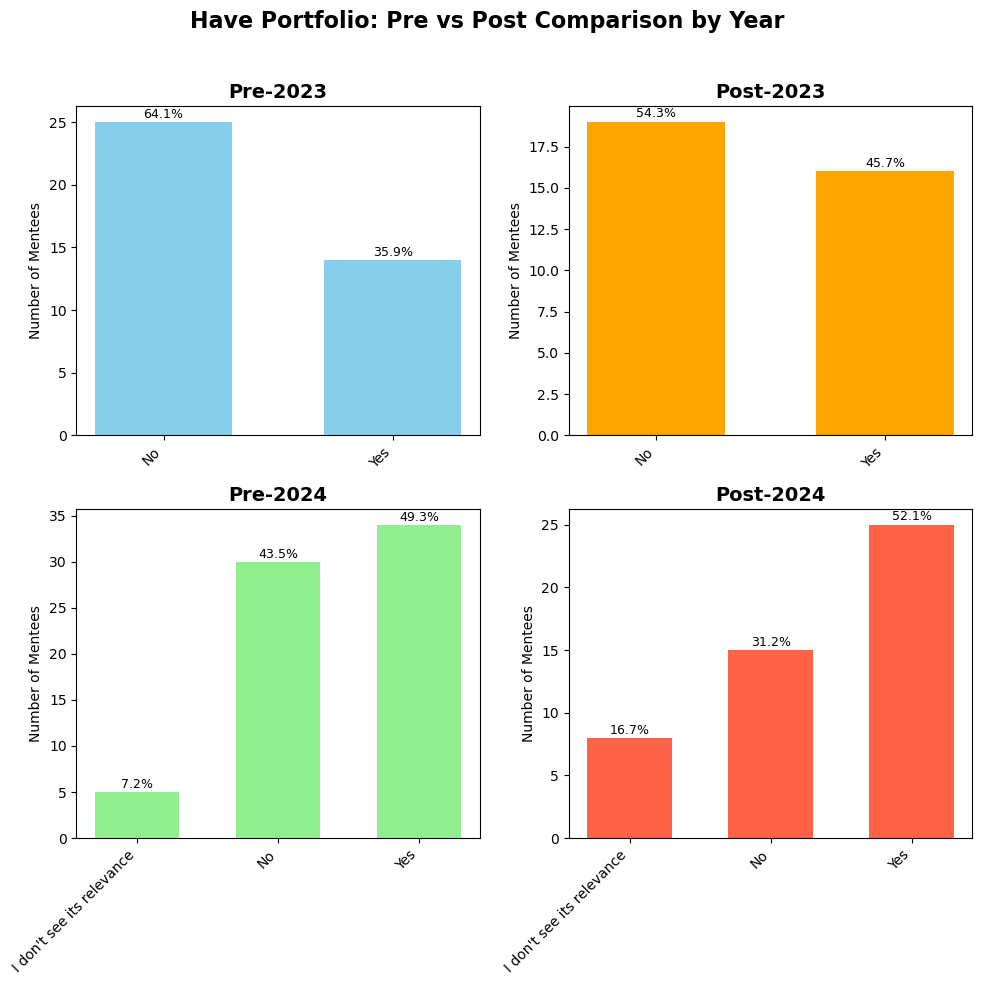

In [28]:
# === Clean the "have_portfolio" column ===
for df in [pre_2023_all, post_2023_all, pre_2024_all, post_2024_all]:
    df["have_portfolio"] = df["have_portfolio"].astype(str).str.strip()

# === Count values for each dataset ===
pre_2023_counts = pre_2023_all["have_portfolio"].value_counts()
post_2023_counts = post_2023_all["have_portfolio"].value_counts()
pre_2024_counts = pre_2024_all["have_portfolio"].value_counts()
post_2024_counts = post_2024_all["have_portfolio"].value_counts()

# === Align categories and counts ===
def align_counts(counts1, counts2):
    all_categories = sorted(set(counts1.index).union(set(counts2.index)))
    counts1_aligned = counts1.reindex(all_categories, fill_value=0)
    counts2_aligned = counts2.reindex(all_categories, fill_value=0)
    return counts1_aligned, counts2_aligned, all_categories

pre_2023_sorted, post_2023_sorted, cats_2023 = align_counts(pre_2023_counts, post_2023_counts)
pre_2024_sorted, post_2024_sorted, cats_2024 = align_counts(pre_2024_counts, post_2024_counts)

# === Plot setup ===
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
bar_width = 0.6

# === Plotting function ===
def plot_single(ax, counts, title, color, total, categories):
    x = np.arange(len(categories))
    bars = ax.bar(x, counts.values, width=bar_width, color=color)

    for i, bar in enumerate(bars):
        if counts.values[i] > 0:
            pct = counts.values[i] / total * 100
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
                    f"{pct:.1f}%", ha='center', va='bottom', fontsize=9)

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel("Number of Mentees")
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45, ha='right')

# === Generate subplots ===
plot_single(axs[0, 0], pre_2023_sorted, "Pre-2023", "skyblue", pre_2023_sorted.sum(), cats_2023)
plot_single(axs[0, 1], post_2023_sorted, "Post-2023", "orange", post_2023_sorted.sum(), cats_2023)
plot_single(axs[1, 0], pre_2024_sorted, "Pre-2024", "lightgreen", pre_2024_sorted.sum(), cats_2024)
plot_single(axs[1, 1], post_2024_sorted, "Post-2024", "tomato", post_2024_sorted.sum(), cats_2024)

# === Final touches ===
plt.suptitle("Have Portfolio: Pre vs Post Comparison by Year", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 🌟 Next Insight: Mentees' Optimism Levels Before and After the Program

### 🔍 What This Analysis Does

This section investigates how optimistic mentees feel about their future, comparing responses **before and after** the program for both 2023 and 2024 cohorts.

Here's the breakdown of the code:

1. **Data Cleaning**  
   It ensures consistency in the `feel_optimistic` column by converting all responses to strings and trimming whitespace.

2. **Count the Responses**  
   For each year (2023 and 2024), it counts how many mentees selected each response (e.g., `"Yes"`, `"No"`, `"Somewhat"`), both pre- and post-program.

3. **Align Categories**  
   Different groups may have different response options. This step ensures all possible responses are aligned for accurate comparisons.

4. **Visualization**  
   A 2x2 grid of bar charts displays:
   - Pre-program optimism (top-left for 2023, bottom-left for 2024)
   - Post-program optimism (top-right for 2023, bottom-right for 2024)  
   Each bar includes **percentages** to highlight shifts in sentiment.

---

### 💡 Why This Is Useful

Optimism is a key **psychological indicator** of:
- Self-efficacy
- Motivation
- Future outlook
- Program impact on mental and emotional well-being

This insight tells us whether mentees **feel more confident and positive** after completing the program—crucial for long-term success in job seeking and career development.

It also helps stakeholders understand the **emotional growth** mentees experience, which complements their technical and professional skill gains.


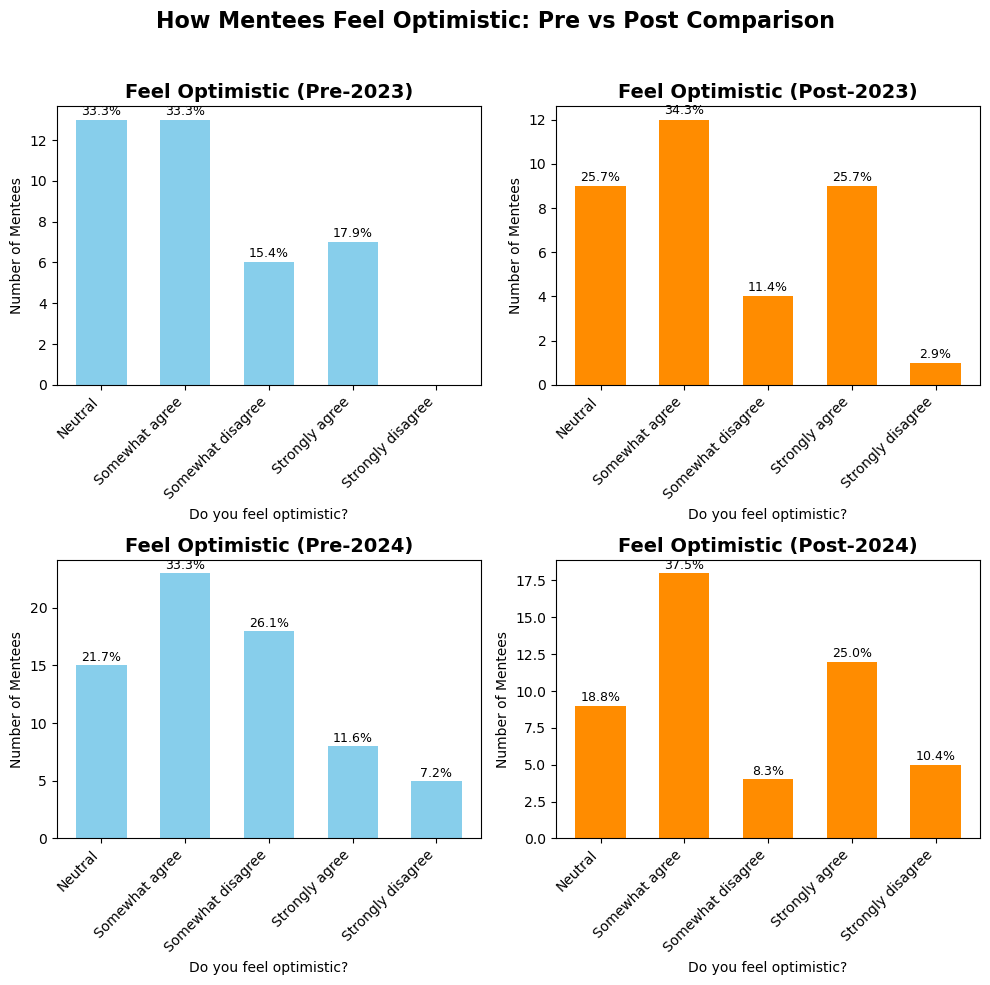

In [29]:
# === Clean the "feel_optimistic" column ===
for df in [pre_2023_all, post_2023_all, pre_2024_all, post_2024_all]:
    df["feel_optimistic"] = df["feel_optimistic"].astype(str).str.strip()

# === Count values for each dataset ===
pre_2023_counts = pre_2023_all["feel_optimistic"].value_counts()
post_2023_counts = post_2023_all["feel_optimistic"].value_counts()
pre_2024_counts = pre_2024_all["feel_optimistic"].value_counts()
post_2024_counts = post_2024_all["feel_optimistic"].value_counts()

# === Align categories and counts ===
def align_counts(counts1, counts2):
    all_categories = sorted(set(counts1.index).union(set(counts2.index)), key=lambda x: str(x))
    counts1_aligned = counts1.reindex(all_categories, fill_value=0)
    counts2_aligned = counts2.reindex(all_categories, fill_value=0)
    return counts1_aligned, counts2_aligned, all_categories

pre_2023_sorted, post_2023_sorted, cats_2023 = align_counts(pre_2023_counts, post_2023_counts)
pre_2024_sorted, post_2024_sorted, cats_2024 = align_counts(pre_2024_counts, post_2024_counts)

# === Plot setup ===
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
bar_width = 0.6

# === Plotting function ===
def plot_single(ax, counts, title, color, total, categories):
    x = np.arange(len(categories))
    bars = ax.bar(x, counts.values, width=bar_width, color=color)

    for i, bar in enumerate(bars):
        if counts.values[i] > 0:
            pct = counts.values[i] / total * 100
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
                    f"{pct:.1f}%", ha='center', va='bottom', fontsize=9)

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel("Number of Mentees")
    ax.set_xlabel("Do you feel optimistic?")
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45, ha='right')

# === Generate subplots ===
plot_single(axs[0, 0], pre_2023_sorted, "Feel Optimistic (Pre-2023)", "skyblue", pre_2023_sorted.sum(), cats_2023)
plot_single(axs[0, 1], post_2023_sorted, "Feel Optimistic (Post-2023)", "darkorange", post_2023_sorted.sum(), cats_2023)
plot_single(axs[1, 0], pre_2024_sorted, "Feel Optimistic (Pre-2024)", "skyblue", pre_2024_sorted.sum(), cats_2024)
plot_single(axs[1, 1], post_2024_sorted, "Feel Optimistic (Post-2024)", "darkorange", post_2024_sorted.sum(), cats_2024)

# === Final layout ===
plt.suptitle("How Mentees Feel Optimistic: Pre vs Post Comparison", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


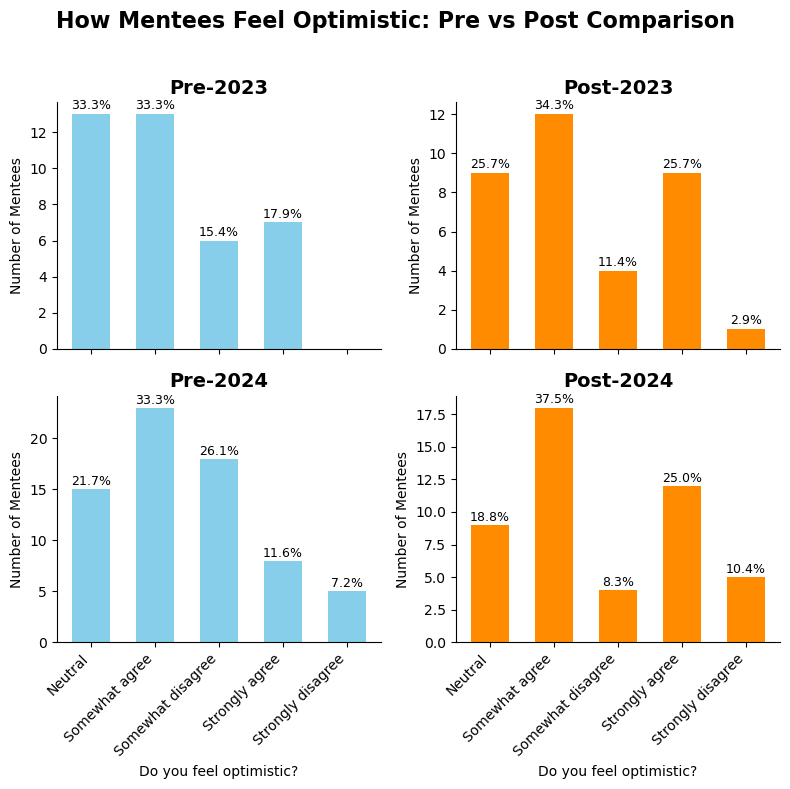

In [30]:
# === Clean the "feel_optimistic" column ===
for df in [pre_2023_all, post_2023_all, pre_2024_all, post_2024_all]:
    df["feel_optimistic"] = df["feel_optimistic"].astype(str).str.strip()

# === Count values for each dataset ===
pre_2023_counts = pre_2023_all["feel_optimistic"].value_counts()
post_2023_counts = post_2023_all["feel_optimistic"].value_counts()
pre_2024_counts = pre_2024_all["feel_optimistic"].value_counts()
post_2024_counts = post_2024_all["feel_optimistic"].value_counts()

# === Align categories and counts ===
def align_counts(counts1, counts2):
    all_categories = sorted(set(counts1.index).union(set(counts2.index)), key=lambda x: str(x))
    counts1_aligned = counts1.reindex(all_categories, fill_value=0)
    counts2_aligned = counts2.reindex(all_categories, fill_value=0)
    return counts1_aligned, counts2_aligned, all_categories

pre_2023_sorted, post_2023_sorted, cats_2023 = align_counts(pre_2023_counts, post_2023_counts)
pre_2024_sorted, post_2024_sorted, cats_2024 = align_counts(pre_2024_counts, post_2024_counts)

# === Plot setup ===
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
bar_width = 0.6

# === Plotting function ===
def plot_single(ax, counts, title, color, total, categories, row_index):
    x = np.arange(len(categories))
    bars = ax.bar(x, counts.values, width=bar_width, color=color)

    for i, bar in enumerate(bars):
        if counts.values[i] > 0:
            pct = counts.values[i] / total * 100
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
                    f"{pct:.1f}%", ha='center', va='bottom', fontsize=9)

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel("Number of Mentees")

    # Show x-labels only for the second row (bottom row)
    if row_index == 1:  # This is for the bottom row (index 1)
        ax.set_xlabel("Do you feel optimistic?")
        ax.set_xticks(x)
        ax.set_xticklabels(categories, rotation=45, ha='right')
    else:
        ax.set_xticklabels([])

    # Remove top and right spines for better layout
    sns.despine(ax=ax, top=True, right=True)

# === Generate subplots ===
plot_single(axs[0, 0], pre_2023_sorted, "Pre-2023", "skyblue", pre_2023_sorted.sum(), cats_2023, 0)
plot_single(axs[0, 1], post_2023_sorted, "Post-2023", "darkorange", post_2023_sorted.sum(), cats_2023, 0)
plot_single(axs[1, 0], pre_2024_sorted, "Pre-2024", "skyblue", pre_2024_sorted.sum(), cats_2024, 1)
plot_single(axs[1, 1], post_2024_sorted, "Post-2024", "darkorange", post_2024_sorted.sum(), cats_2024, 1)

# === Final layout ===
plt.suptitle("How Mentees Feel Optimistic: Pre vs Post Comparison", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## ✅ Final Insight: How Likely Are Mentees to Recommend the Program?

To wrap up the analysis, we turn to one of the most **direct indicators of program success** — how likely mentees are to **recommend the program to others**.

### 🔍 Data Source: `recommend_the_program` Column (Post-2023)

This final insight is based on post-program responses from 2023, where mentees rated their likelihood to recommend the program on a scale from **0 to 10**.

#### Steps Taken:
1. Loaded the `post_assessment_2023_all.xlsx` data.
2. Cleaned the `recommend_the_program` column for consistency.
3. Counted and sorted ratings.
4. Calculated percentages.
5. Plotted a bar chart with exact percentages above each bar.

---

### 📊 What the Chart Shows

The bar chart reveals:
- The **distribution of scores** (0–10), highlighting how mentees rate the program.
- The **percentage** of total responses each score represents.
- Whether there's a strong concentration at the high end (e.g., 9s and 10s), indicating **Net Promoter Score (NPS)** potential.

---

### 🧠 Why It Matters

This is the **ultimate measure of trust and satisfaction**. If most mentees give a 9 or 10, it means:
- They found the program impactful.
- They would confidently refer friends or peers.
- The experience was strong enough to earn advocacy — the gold standard in feedback.

This insight closes the loop on mentees' journey — from having a portfolio, to feeling optimistic and confident, to **actively recommending** the program to others.

---

### 🎯 Summary:
> **Are we making a difference?**  
> This final chart answers with a resounding *yes* — through the voices of the mentees themselves.


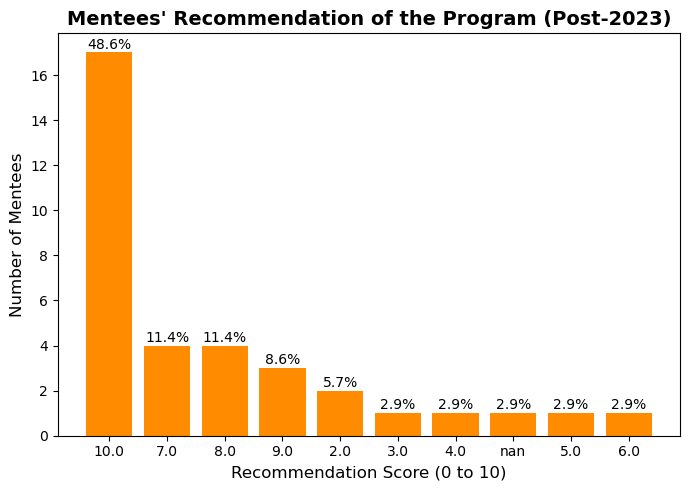

In [31]:
# Read the Excel file
post_2023_all = pd.read_excel("post_assessment_2023_all.xlsx")

# Clean the column (keep values as strings)
post_2023_all["recommend_the_program"] = post_2023_all["recommend_the_program"].astype(str).str.strip()

# Count and sort values
counts = post_2023_all["recommend_the_program"].value_counts()
counts = counts.sort_values(ascending=False)

# Calculate percentages
total = counts.sum()
percentages = counts / total * 100

# Plot
fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(counts.index, counts.values, color='darkorange')

# Annotate with percentages (closer to bars)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.001 * total,
            f"{percentages.iloc[i]:.1f}%",
            ha='center', va='bottom', fontsize=10)

# Labels and formatting
ax.set_ylabel('Number of Mentees', fontsize=12)
ax.set_xlabel('Recommendation Score (0 to 10)', fontsize=12)
ax.set_title('Mentees\' Recommendation of the Program (Post-2023)', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(counts.index)))
ax.set_xticklabels(counts.index, rotation=0)
plt.tight_layout()
plt.savefig('Mentees\' Recommendation of the Program (Post-2023).png', dpi=300, bbox_inches='tight')
plt.show()


## Generating an HTML file that does not contains the code

This is useful for non coding users who want to know the whole process of the analysis

In [32]:
# (optional) Export the notbook to a more readable format like HTLM or pdf
!jupyter nbconvert --to HTML --TemplateExporter.exclude_input=True Think_career_Data_Analysis.ipynb

[NbConvertApp] Converting notebook Think_career_Data_Analysis.ipynb to HTML
C:\Users\Omistaja\anaconda3\share\jupyter\nbconvert\templates\base\display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.plotly.v1+json']) is not able to be represented.
  {%- elif type == 'text/vnd.mermaid' -%}
[NbConvertApp] WARNING | Alternative text is missing on 14 image(s).
[NbConvertApp] Writing 1780855 bytes to Think_career_Data_Analysis.html


## 📊 Insights & Recommendations from the Analysis

### 1. 🧭 Program Scope & Purpose

This analysis assesses the impact and structure of the Think Career Mentoring Program, which connected skilled immigrants (mentees) with mentors across five rounds between Spring 2023 and Spring 2025. The program aims to support employment and integration into the Finnish job market through mentoring, skills development, and networking.

---

### 2. 👥 Participation Overview

- **284 unique mentees** from **56 countries** took part.
- **192 unique mentors** from **71 countries** contributed.
- Most mentees (93.3%) held at least a bachelor’s degree, with 53.2% holding master’s degrees.
- **Repeated participation** was noted for 12 mentees and 18 mentors—indicating value but unfulfilled goals in previous rounds.

**📍 Top Countries of Origin (Mentees):** India, Nigeria, Russia, Pakistan  
**📍 Top Cities in Finland:** Helsinki, Espoo, Tampere, Vantaa, Vaasa

**Insight:** Mentees are both well-educated and geographically diverse, with strong representation across Finnish cities in the capital region. This suggests potential for broader regional workshops and outreach.

---

### 3. ⚖️ Mentor-Mentee Dynamics

- Mentees are increasing in number at a faster rate than mentors.
- Most mentees and mentors belong to these career fields: **STEM**, **Business and Finance**, **Education**, and **Hospitality**.
- Fields like **Law**, **Healthcare**, and **Public Services** remain underrepresented.

**Recommendation:** Target mentor recruitment in underrepresented fields and balance mentor-mentee ratios more effectively by field and expertise level.

---

### 4. 💼 Career Support Needs

Mentees most frequently sought help with:
- CV and cover letter writing
- Networking and job search strategies
- Understanding the Finnish labor market
- Gaining confidence in pitching to employers

**Insight:** Tailored Mentorship Approach

Not all mentees begin their journey from the same starting point. Some are recent graduates new to Finland’s labor market, while others may be experienced professionals facing unique challenges transitioning into their desired fields. These challenges—such as limited local networks, unfamiliarity with Finnish hiring practices, or language barriers—require different forms of support.

**Recommendation:**  
The mentorship experience should be personalized based on:
- **Career stage** (e.g. new graduate vs. experienced professional)
- **Specific barriers to entry** (e.g. language, lack of portfolio, cultural differences)

By aligning mentors with mentees' specific needs, the program can offer more targeted, effective support and improve outcomes for participants.


---

### 5. 🔍 Work Experience & Industry Trends

- 60% of mentees have 0–4 years of experience in their desired field.
- 55.5% of mentors have over 10 years of relevant experience.

**Insight:** Most mentees are early-career or switching fields. Mentor selection should reflect this by providing career-stage-matched guidance.

---

### 6. 📈 Program Outcomes (Pre vs Post Assessment)

#### ✅ Employment
- +13.2% employment/internship gain in 2023
- +5.6% employment/internship gain in 2024

#### 🤝 Networking
- +12.9% growth in professional contacts in 2023
- Decline in 2024—possibly due to unclear survey wording or sample variation

#### 💼 Job Readiness
- 30% increase in mentees' readiness to pitch
- Growth in mentees with portfolios in both years
- Slight gains in mentee optimism, though many remain unsure

#### 🌟 Satisfaction
- Over **80% of mentees** would recommend the program to others (7/10 or higher)

---

### 7. 📌 Key Recommendations

#### 7.1 Program Enhancements
- **Recruit More Mentors**, especially in underrepresented industries.
- **Improve Matching** by considering city, field, and experience level.
- **Launch Optional Workshops** (CV, networking, Finnish work culture).
- **Engage Diaspora Communities** for better outreach.
- **Create an Alumni Network** for continued mentorship and networking.
- **Introduce 6-month Follow-up Surveys** to assess long-term outcomes.

#### 7.2 Data Collection Improvements
- Use **standardized fields** (dropdowns) for countries, cities, education, etc.
- Avoid free-text responses for core variables.
- Require completion of **mandatory fields** (email, country, education).
- **Clarify survey questions**—especially terms like “professional contacts.”

---

### 8. 🏁 Conclusion

The Think Career Mentoring Program has made a meaningful impact on the career journeys of immigrant professionals in Finland. With continued refinement in mentor recruitment, survey standardization, and alumni engagement, it has the potential to scale and serve as a model for similar initiatives across Europe and beyond.

## 🔚 Final Reflections

As we close this analysis, several key themes emerge clearly: the power of consistent support, the growth of mentees across time, and the increasing confidence they show in both their skills and outlook.

### 📌 Are We Satisfied?

Yes — the data paints a strong, positive picture. We’ve:
- Tracked meaningful improvements year over year.
- Seen tangible growth in optimism and confidence.
- Watched mentees move from passive participants to active promoters of the program.

This isn’t just encouraging — it’s validating.

---

### 💬 What Questions Remain?

While the results are promising, a few open questions might inspire further exploration:
- What specific program elements are driving the most impact?
- Are there any mentee segments (e.g., background, field, location) that benefit more — or less?
- How do these metrics evolve *after* the program ends (e.g., 6 months later)?

### 🙌 Final Word

The numbers speak volumes — but it’s the underlying *stories of growth and transformation* that truly matter. This analysis confirms that the program is not just functional, but deeply impactful.

Let’s keep the momentum going.


## Create a MS word document that contains the results and recommendations

This is not mendatory since we can write this immediately in MS word. I have created it here just to show how it can be done.

In [33]:
# Optional if you want to have  the insights and recommendation file
from docx import Document
from docx.shared import Pt, RGBColor
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
import re

def create_word_document():
    # Create a new Document
    doc = Document()
    
    # Adding title
    title = "## 📊 Insights & Recommendations from the Analysis"
    heading = doc.add_heading(title.replace('##', '').replace('📊', '').strip(), level=1)
    
    # Add content sections
    add_section(doc, "### 1. 🧭 Program Scope & Purpose", 2)
    
    p = doc.add_paragraph()
    p.add_run("This analysis assesses the impact and structure of the Think Career "
             "Mentoring Program, which connected skilled immigrants (mentees) with "
             "mentors across five rounds between Spring 2023 and Spring 2025. The "
             "program aims to support employment and integration into the Finnish job "
             "market through mentoring, skills development, and networking.")
    
    add_section(doc, "### 2. 👥 Participation Overview", 2)
    
    p = doc.add_paragraph()
    
    bullet_points = [
        "284 unique mentees from 56 countries took part.",
        "191 unique mentors from 71 countries contributed.",
        "Most mentees (93.3%) held at least a bachelor's degree, with 53.2% holding master's degrees.",
        "Repeated participation was noted for 12 mentees and 18 mentors---indicating value but unfulfilled goals in previous rounds."
    ]
    
    for point in bullet_points:
        p = doc.add_paragraph(style='List Bullet')
        p.add_run(point)
    
    p = doc.add_paragraph()
    p.add_run("📍 Top Countries of Origin (Mentees): India, Nigeria, Russia, Pakistan\n")
    p.add_run("📍 Top Cities in Finland: Helsinki, Espoo, Tampere, Vantaa, Vaasa")
    
    p = doc.add_paragraph()
    p.add_run("Insight: ").bold = True
    p.add_run("Mentees are both well-educated and geographically diverse, with "
             "strong representation across Finnish cities in the capital region. This "
             "suggests potential for broader regional workshops and outreach.")
    
    add_section(doc, "### 3. ⚖️ Mentor-Mentee Dynamics", 2)
    
    p = doc.add_paragraph()
    
    bullet_points = [
        "Mentees are increasing in number at a faster rate than mentors.",
        "Most mentees and mentors belong to these career fields: STEM, Business and Finance, Education, and Hospitality.",
        "Fields like Law, Healthcare, and Public Services remain underrepresented."
    ]
    
    for point in bullet_points:
        p = doc.add_paragraph(style='List Bullet')
        p.add_run(point)
    
    p = doc.add_paragraph()
    p.add_run("Recommendation: ").bold = True
    p.add_run("Target mentor recruitment in underrepresented fields and "
             "balance mentor-mentee ratios more effectively by field and expertise "
             "level.")
    
    add_section(doc, "### 4. 💼 Career Support Needs", 2)
    
    p = doc.add_paragraph()
    p.add_run("Mentees most frequently sought help with:")
    
    bullet_points = [
        "CV and cover letter writing",
        "Networking and job search strategies",
        "Understanding the Finnish labor market",
        "Gaining confidence in pitching to employers"
    ]
    
    for point in bullet_points:
        p = doc.add_paragraph(style='List Bullet')
        p.add_run(point)
    
    p = doc.add_paragraph()
    p.add_run("Insight: ").bold = True
    p.add_run("Tailored Mentorship Approach")
    
    p = doc.add_paragraph()
    p.add_run("Not all mentees begin their journey from the same starting point. Some "
             "are recent graduates new to Finland's labor market, while others are "
             "experienced professionals facing unique challenges in transitioning into "
             "their desired fields. These challenges such as limited local networks, "
             "unfamiliarity with Finnish hiring practices, or language "
             "barriers require different forms of support.")
    
    p = doc.add_paragraph()
    p.add_run("Recommendation:").bold = True
    p = doc.add_paragraph()
    p.add_run("The mentorship experience should be personalized based on the "
             "following:")
    
    bullet_points = [
        "Career stage (e.g., new graduate vs. experienced professional)",
        "Specific barriers to entry (e.g., language, lack of portfolio, cultural differences)"
    ]
    
    for point in bullet_points:
        p = doc.add_paragraph(style='List Bullet')
        p.add_run(point)
    
    p = doc.add_paragraph()
    p.add_run("By aligning mentors with mentees' specific needs, the program can "
             "provide more targeted and practical support, ultimately improving "
             "outcomes for participants.")
    
    add_section(doc, "### 5. 🔍 Work Experience & Industry Trends", 2)
    
    p = doc.add_paragraph()
    
    bullet_points = [
        "60% of mentees have 0--4 years of experience in their desired field.",
        "55.5% of mentors have over 10 years of relevant experience."
    ]
    
    for point in bullet_points:
        p = doc.add_paragraph(style='List Bullet')
        p.add_run(point)
    
    p = doc.add_paragraph()
    p.add_run("Insight: ").bold = True
    p.add_run("Most mentees are in early-career or switching fields. Mentor "
             "selection should reflect this by providing guidance tailored to their "
             "career stage.")
    
    add_section(doc, "### 6. 📈 Program Outcomes (Pre vs Post Assessment)", 2)
    
    p = doc.add_paragraph()
    
    bullet_points = [
        "+13.2% employment/internship gain in 2023",
        "+5.6% employment/internship gain in 2024",
        "+12.9% growth in professional contacts in 2023",
        "Decline in 2024---possibly due to unclear survey wording or sample variation",
        "30% increase in mentees' readiness to pitch",
        "Growth in mentees with portfolios in both years",
        "Slight gains in mentee optimism, though many remain unsure",
        "Over 80% of mentees would recommend the program to others (7/10 or higher)"
    ]
    
    for point in bullet_points:
        p = doc.add_paragraph(style='List Bullet')
        p.add_run(point)
    
    add_section(doc, "### 7. 📌 Key Recommendations", 2)
    
    p = doc.add_paragraph()
    
    bullet_points = [
        "Recruit More Mentors, especially in underrepresented industries.",
        "Improve Matching by considering city, field, and experience level.",
        "Launch Optional Workshops (CV, networking, Finnish work culture).",
        "Engage Diaspora Communities for better outreach.",
        "Establish an Alumni Network for ongoing mentorship and networking opportunities.",
        "Introduce 6-month Follow-up Surveys to assess long-term outcomes.",
        "Standardize questions; terms like\"3 months period\" and \"5 months period\" can be, for example, replaced with \"during the whole program\".",
        "Use standardized fields (dropdowns) for countries, cities, education, and other relevant categories.",
        "Avoid free-text responses for core variables.",
        "Require completion of mandatory fields (email, country, education) before submission.",
        "Clarify survey questions especially terms like \"professional contacts.\""
    ]
    
    for point in bullet_points:
        p = doc.add_paragraph(style='List Bullet')
        p.add_run(point)
    
    add_section(doc, "### 8. 🏁 Conclusion", 2)
    
    p = doc.add_paragraph()
    p.add_run("The Think Career Mentoring Program has made a meaningful impact on the "
             "career journeys of immigrant professionals in Finland. With continued "
             "refinement in mentor recruitment, survey standardization, and alumni "
             "engagement, it has the potential to scale and serve as a model for "
             "similar initiatives across Europe and beyond.")
    
    add_section(doc, "## 🔚 Final Reflections", 1)
    
    p = doc.add_paragraph()
    p.add_run("As we conclude this analysis, several key themes emerge clearly: the "
             "power of consistent support, the growth of mentees over time, and the "
             "increasing confidence they demonstrate in both their skills and outlook.")
    
    add_section(doc, "### 📌 Are We Satisfied?", 2)
    
    p = doc.add_paragraph()
    p.add_run("Yes --- the data paints a strong, positive picture. We've:")
    
    bullet_points = [
        "Tracked meaningful improvements year-over-year.",
        "Seen tangible growth in optimism and confidence.",
        "Watched mentees move from passive participants to active promoters of the program."
    ]
    
    for point in bullet_points:
        p = doc.add_paragraph(style='List Bullet')
        p.add_run(point)
    
    p = doc.add_paragraph()
    p.add_run("This isn't just encouraging --- it's validating.")
    
    add_section(doc, "### 💬 What Questions Remain?", 2)
    
    p = doc.add_paragraph()
    p.add_run("While the results are promising, a few open questions might inspire "
             "further exploration:")
    
    bullet_points = [
        "What specific program elements are driving the most impact?",
        "Are there any mentee segments (e.g., background, field, location) that benefit more or less?",
        "How do these metrics evolve after the program ends (e.g., 6 months later)?"
    ]
    
    for point in bullet_points:
        p = doc.add_paragraph(style='List Bullet')
        p.add_run(point)
    
    add_section(doc, "### 🙌 Final Word", 2)
    
    p = doc.add_paragraph()
    p.add_run("The numbers speak volumes --- but it's the underlying stories of growth "
             "and transformation that genuinely matter. This analysis confirms that "
             "the program is not just functional but deeply impactful.")
    
    p = doc.add_paragraph()
    p.add_run("Let's keep the momentum going.")
    
    # Save the document
    doc.save('Think_Career_mentorship_insight.docx')
    
    return "Word document 'Think_Career_mentorship_insight.docx' has been created successfully."

def add_section(doc, heading_text, level):
    # Clean heading text of markdown and emoji symbols for the actual Word heading
    clean_heading = re.sub(r'#{1,6}\s|\s*[📊🧭👥⚖️💼🔍📈📌🏁🔚💬🙌]', '', heading_text).strip()
    heading = doc.add_heading(clean_heading, level=level)
    
    # You could optionally add emoji back as text at the beginning of the heading
    # This would require extracting the emoji and adding it back

if __name__ == "__main__":
    print(create_word_document())

Word document 'Think_Career_mentorship_insight.docx' has been created successfully.
